In [1]:
!pip install --upgrade pip setuptools wheel ace_tools -q

In [2]:
import warnings
warnings.filterwarnings("ignore", message=".*load_learner uses Python's insecure pickle module.*")


In [ ]:
%conda install -q matplotlib==3.9.2 shap==0.43.0

In [ ]:
!pip install -q matplotlib==3.9.2 shap==0.43.0

In [3]:
!pip install -q setuptools_scm
!pip install --use-pep517 -q autogluon

In [4]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import os


## Data Preparation

In [5]:
data = TabularDataset('./Sorted_cases_112.csv')

In [6]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd



In [7]:
data.head()

ruptureStatus  AneurysmLocation  Aneurysmtype  Systole_STAWSS  \
0             U                 2             0        7.071652   
1             U                 2             0       10.723056   
2             U                 3             1        2.500742   
3             U                 2             0       17.299510   
4             U                 2             0        2.559540   

   Systole_WSSMin  Systole_WSSMax  Mean_OSI   Std_OSI   TA_LSA_2  \
0        0.220668        53.91848  0.043938  0.059554  35.027560   
1        0.168184        91.48010  0.010266  0.025436  14.976442   
2        0.170000        26.62876  0.015389  0.029174  50.328120   
3        0.997982        55.53610  0.012750  0.022321   1.008826   
4        0.088694        74.84070  0.044575  0.072770  46.295500   

   TA_LSA_Std_2  ...        V2        V3        V4        V5        V6  \
0     15.440718  ...  1.000000  0.964125  0.937868  0.917193  0.895229   
1     14.570178  ...  1.000000  0.961449  0.941938  0.914550  0.875983   
2     26.836150  ...  0.971160  0.939763  0.900603  0.856780  0.805408   
3      2.010744  ...  0.948575  0.903924  0.859164  0.808548  0.752734   
4     27.227870  ...  0.974006  0.949851  0.886328  0.808491  0.631421   

         V7        V8        V9  V10  V11  
0  0.869847  0.833682  0.773206  0.0  0.0  
1  0.780701  0.000000  0.000000  0.0  0.0  
2  0.724410  0.000000  0.000000  0.0  0.0  
3  0.684616  0.619072  0.000000  0.0  0.0  
4  0.000000  0.000000  0.000000  0.0  0.0  

[5 rows x 34 columns]

In [8]:
data.shape

(1792, 34)

In [9]:
data.describe()

AneurysmLocation  Aneurysmtype  Systole_STAWSS  Systole_WSSMin  \
count       1792.000000   1792.000000     1792.000000     1792.000000   
mean           1.723214      0.642857        6.826072        0.463126   
std            0.758615      0.479291        6.106241        0.836586   
min            1.000000      0.000000        0.117059        0.000086   
25%            1.000000      0.000000        2.722131        0.106395   
50%            2.000000      1.000000        5.265529        0.218127   
75%            2.000000      1.000000        8.354796        0.517223   
max            3.000000      1.000000       37.505040        6.197136   

       Systole_WSSMax     Mean_OSI      Std_OSI     TA_LSA_2  TA_LSA_Std_2  \
count     1792.000000  1792.000000  1792.000000  1792.000000   1792.000000   
mean        55.728644     0.024419     0.040096    36.917937     18.885610   
std         51.826457     0.040590     0.031635    26.969775      9.513880   
min          3.765360     0.004548     0.009334     0.000000      0.000000   
25%         26.443677     0.011942     0.025580    15.010236     13.877567   
50%         41.278300     0.015969     0.032955    27.916420     19.067940   
75%         65.161230     0.023083     0.046370    57.049940     26.075440   
max        308.529600     0.400837     0.293051    99.851820     37.082343   

           Bulbous  ...           V2           V3           V4           V5  \
count  1792.000000  ...  1792.000000  1792.000000  1792.000000  1792.000000   
mean      0.366071  ...     0.959204     0.921209     0.876363     0.821240   
std       0.481864  ...     0.034037     0.055167     0.090228     0.156915   
min       0.000000  ...     0.796265     0.707435     0.514051     0.000000   
25%       0.000000  ...     0.948383     0.903353     0.843929     0.795417   
50%       0.000000  ...     0.963228     0.930311     0.897970     0.864783   
75%       1.000000  ...     0.977932     0.958708     0.938345     0.915166   
max       1.000000  ...     1.000000     0.989110     0.983737     0.978153   

                V6           V7           V8           V9          V10  \
count  1792.000000  1792.000000  1792.000000  1792.000000  1792.000000   
mean      0.758215     0.648482     0.502620     0.320669     0.185753   
std       0.213845     0.310575     0.373101     0.386011     0.339280   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.732134     0.658209     0.000000     0.000000     0.000000   
50%       0.822453     0.760518     0.685215     0.000000     0.000000   
75%       0.880987     0.841669     0.804320     0.752309     0.000000   
max       0.971409     0.961017     0.948410     0.932130     0.912368   

               V11  
count  1792.000000  
mean      0.059987  
std       0.216920  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.890780  

[8 rows x 33 columns]

In [ ]:

def generate_train_val_test(dataset_logical_id, random_state=42):
    data = TabularDataset("./Sorted_cases_112_no_case.csv")
    data["ruptureStatus"] = data["ruptureStatus"].map({"R": 1, "U": 0})
    data["Aneurysm Location"] = data["Aneurysm Location"].map(lambda v: str(v))
    data["Aneurysm type"] = data["Aneurysm type"].map(lambda v: str(v))
    data["Bulbous"] = data["Bulbous"].map(lambda v: str(v))

    train_data, test_data = train_test_split(data, test_size=0.2, random_state=random_state)
    train_data = train_data.sample(frac=1).reset_index(drop=True)
    test_data = test_data.sample(frac=1).reset_index(drop=True)
    shuffle(train_data).to_csv(f"data/training_and_validation_with_more_cols/train_and_val_data{dataset_logical_id}.csv", index=False)
    shuffle(test_data).to_csv(f"data/test_with_more_cols/test_data{dataset_logical_id}.csv", index=False)

    return train_data, test_data


In [ ]:
import pandas as pd

def change_data():
    for i in range(1, 101):
        X = pd.read_csv(f"./data/test_with_more_cols/test_data{i}.csv")
    
        X["Ostium Area"] = X["Ostium Area"]**(1/2.0)
        X["Aneurysm Area"] = X["Aneurysm Area"]**(1/2.0)
        X["sacVolume"] = X["sacVolume"]**(1/3.0)
    
        # feature combos
        X["OSI to Ostium area"] = X["Mean_OSI"] / (X["Ostium Area"]**2)
        X["Sac_Max_WidthTimesSizeRatio"] = X["Sac_Max_Width"]*X["Size_ratio_width"]
        
        X.to_csv(f"./data/test_with_more_cols/test_data{i}.csv", index=False)
        
    for i in range(1, 101):
        X = pd.read_csv(f"./data/training_and_validation_with_more_cols/train_and_val_data{i}.csv")
    
        X["Ostium Area"] = X["Ostium Area"]**(1/2.0)
        X["Aneurysm Area"] = X["Aneurysm Area"]**(1/2.0)
        X["sacVolume"] = X["sacVolume"]**(1/3.0)
    
        # feature combos
        X["OSI to Ostium area"] = X["Mean_OSI"] / (X["Ostium Area"]**2)
        X["Sac_Max_WidthTimesSizeRatio"] = X["Sac_Max_Width"]*X["Size_ratio_width"]
        
        X.to_csv(f"./data/training_and_validation_with_more_cols/train_and_val_data{i}.csv", index=False)



In [ ]:
# this function is idempotent
def reset_all_data():
    datasets = [generate_train_val_test(i, 42*i**2) for i in range(1, 101)]
    change_data()
    

## Load Data Pre-Generated

In [ ]:
datasets = [(pd.read_csv(f"data/training_and_validation_with_more_cols/train_and_val_data{i}.csv"), pd.read_csv(f"data/test_with_more_cols/test_data{i}.csv")) for i in range(1, 101)]

## Model Training

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

models = []
label = 'ruptureStatus'  # Set your target column
def f(train_and_val_data, time_limit, preset, logical_id, label):
    return TabularPredictor(eval_metric="roc_auc", problem_type="binary", label=label, path=f"autogluon_models{logical_id}") \
                            .fit(train_and_val_data, time_limit=time_limit, presets='best_quality', fit_strategy="parallel")
res = []
time_limit = 450 # seconds
for i in range(0, 100):
    train_and_val_data, test_data = datasets[i]
    res.append(f(train_and_val_data, time_limit, "best_quality", i+1, label))

models = res

In [ ]:
predictor = TabularPredictor.load("autogluon_models5")
predictor.leaderboard(pd.read_csv("./data/test_with_more_cols/test_data5.csv"))

In [ ]:
predictor.model_names()


## Using Best Trained Model to Get Result Graphs / Metrics

In [10]:
datasets = [(pd.read_csv(f"data/training_and_validation_with_more_cols/train_and_val_data{i}.csv"), pd.read_csv(f"data/test_with_more_cols/test_data{i}.csv")) for i in range(1, 101)]

In [11]:
train_data = pd.read_csv("data/training_and_validation_with_more_cols/train_and_val_data1.csv")
test_data = pd.read_csv("data/test_with_more_cols/test_data1.csv")

for i in range(2, 101):
    train_data = pd.concat([train_data, pd.read_csv(f"data/training_and_validation_with_more_cols/train_and_val_data{i}.csv")], axis=0)
    test_data = pd.concat([test_data, pd.read_csv(f"data/test_with_more_cols/test_data{i}.csv")], axis=0)


In [12]:
predictors = [TabularPredictor.load(f"./autogluon_models{i}/") for i in range(1, 101)]

In [13]:
classes = ["CatBoost", "NeuralNetFastAI", "LightGBM", "ExtraTrees", "XGBoost", "RandomForest", "Ensemble", "NeuralNetTorch", "ExtraTrees", "Best"]

best_models_arr = []
for i in range(100):
    model_performance = predictors[i].fit_summary()["model_performance"]
    
    best_models = {}
    
    for class_name in classes:
        if class_name == "Best":
            best_models[class_name] = None # forces default of using best model based on validation data
        else:
            best_score = -float('inf')
            best_model = None
        
            for model_name, score in model_performance.items():
                if score is not None and class_name in model_name:
                    if score > best_score:
                        best_score = score
                        best_model = model_name
        
            if best_model:
                best_models[class_name] = best_model

    best_models_arr.append(best_models)

*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L2   0.907484     roc_auc       0.322501  29.914122                0.000632           0.040932            2       True        111
1           CatBoost_r128_BAG_L1   0.851871     roc_auc       0.012960  17.691362                0.012960          17.691362            1       True         76
2           CatBoost_r167_BAG_L1   0.851351     roc_auc       0.012030   7.880895                0.012030           7.880895            1       True         57
3           CatBoost_r143_BAG_L1   0.848753     roc_auc       0.013921   3.863124                0.013921           3.863124            1       True         81
4             CatBoost_r5_BAG_L1   0.846154     roc_auc       0.011868   2.180192                0.011868           2.180192            1 

In [14]:
best_models_arr

[{'CatBoost': 'CatBoost_r128_BAG_L1',
  'NeuralNetFastAI': 'NeuralNetFastAI_r143_BAG_L1',
  'LightGBM': 'LightGBM_r188_BAG_L1',
  'ExtraTrees': 'ExtraTrees_r197_BAG_L1',
  'XGBoost': 'XGBoost_r98_BAG_L1',
  'RandomForest': 'RandomForestGini_BAG_L1',
  'Ensemble': 'WeightedEnsemble_L2',
  'NeuralNetTorch': 'NeuralNetTorch_r158_BAG_L1',
  'Best': None},
 {'CatBoost': 'CatBoost_r128_BAG_L1',
  'NeuralNetFastAI': 'NeuralNetFastAI_r134_BAG_L1',
  'LightGBM': 'LightGBM_r188_BAG_L1',
  'ExtraTrees': 'ExtraTreesGini_BAG_L1',
  'XGBoost': 'XGBoost_r194_BAG_L1',
  'RandomForest': 'RandomForestEntr_BAG_L1',
  'Ensemble': 'WeightedEnsemble_L2',
  'NeuralNetTorch': 'NeuralNetTorch_r30_BAG_L1',
  'Best': None},
 {'CatBoost': 'CatBoost_r70_BAG_L1',
  'NeuralNetFastAI': 'NeuralNetFastAI_r191_BAG_L1',
  'LightGBM': 'LightGBMLarge_BAG_L1',
  'ExtraTrees': 'ExtraTrees_r178_BAG_L1',
  'XGBoost': 'XGBoost_r98_BAG_L1',
  'RandomForest': 'RandomForestEntr_BAG_L1',
  'Ensemble': 'WeightedEnsemble_L2',
  'Neur

In [15]:
predictors

In [16]:
test_data

ruptureStatus  Aneurysm Location  Aneurysm type  Systole_STAWSS  \
0               1                  2              0        9.000744   
1               1                  3              1       10.617870   
2               0                  1              0        1.096004   
3               1                  2              0        8.361626   
4               0                  1              1       16.891350   
..            ...                ...            ...             ...   
18              0                  2              0       10.723056   
19              1                  3              1        2.672947   
20              1                  1              1        4.623434   
21              0                  1              1       10.588820   
22              1                  2              1        4.381632   

    Systole_WSSMin  Systole_WSSMax  Mean_OSI   Std_OSI   TA_LSA_2  \
0         0.179403       180.91220  0.400837  0.058700  28.680340   
1         0.820000        86.83862  0.019435  0.037935   8.755240   
2         0.033464        32.68568  0.025453  0.054573  89.788360   
3         0.246793        41.22770  0.009935  0.025628  19.627740   
4         0.506881        70.66332  0.026564  0.045677   7.480691   
..             ...             ...       ...       ...        ...   
18        0.168184        91.48010  0.010266  0.025436  14.976442   
19        0.062700        14.34753  0.013949  0.022650  53.135680   
20        0.252856        32.36002  0.012211  0.024313  29.600000   
21        0.230628        39.24540  0.016175  0.034358   8.945418   
22        0.143131        39.08910  0.011811  0.028677  53.107920   

    TA_LSA_Std_2  ...        V4        V5        V6        V7        V8  \
0      22.206990  ...  0.910449  0.887625  0.862184  0.841293  0.819197   
1      14.139230  ...  0.873813  0.838015  0.800155  0.755489  0.703050   
2       5.943229  ...  0.915862  0.893255  0.865938  0.842796  0.818239   
3      21.070330  ...  0.810219  0.769708  0.731104  0.689148  0.000000   
4       8.779291  ...  0.673817  0.577224  0.000000  0.000000  0.000000   
..           ...  ...       ...       ...       ...       ...       ...   
18     14.570178  ...  0.941938  0.914550  0.875983  0.780701  0.000000   
19     21.244030  ...  0.832303  0.792684  0.752841  0.716019  0.672625   
20     29.967010  ...  0.810451  0.763573  0.716078  0.668034  0.000000   
21     12.449600  ...  0.942346  0.923467  0.905688  0.884931  0.861388   
22     15.330874  ...  0.930390  0.904619  0.868082  0.802707  0.000000   

          V9       V10       V11  OSI to Ostium area  \
0   0.791020  0.759465  0.000000            0.018158   
1   0.000000  0.000000  0.000000            0.001563   
2   0.794696  0.772636  0.752315            0.001151   
3   0.000000  0.000000  0.000000            0.000570   
4   0.000000  0.000000  0.000000            0.001884   
..       ...       ...       ...                 ...   
18  0.000000  0.000000  0.000000            0.000515   
19  0.000000  0.000000  0.000000            0.002305   
20  0.000000  0.000000  0.000000            0.001362   
21  0.828548  0.778855  0.000000            0.000112   
22  0.000000  0.000000  0.000000            0.000699   

    Sac_Max_WidthTimesSizeRatio  
0                     52.207538  
1                     10.289621  
2                     29.523693  
3                      4.378975  
4                     15.377481  
..                          ...  
18                     8.553495  
19                     3.213926  
20                     6.440764  
21                    27.510012  
22                     7.242319  

[2300 rows x 36 columns]

In [17]:
y_test = test_data.pop("ruptureStatus")

In [18]:
test_data

Aneurysm Location  Aneurysm type  Systole_STAWSS  Systole_WSSMin  \
0                   2              0        9.000744        0.179403   
1                   3              1       10.617870        0.820000   
2                   1              0        1.096004        0.033464   
3                   2              0        8.361626        0.246793   
4                   1              1       16.891350        0.506881   
..                ...            ...             ...             ...   
18                  2              0       10.723056        0.168184   
19                  3              1        2.672947        0.062700   
20                  1              1        4.623434        0.252856   
21                  1              1       10.588820        0.230628   
22                  2              1        4.381632        0.143131   

    Systole_WSSMax  Mean_OSI   Std_OSI   TA_LSA_2  TA_LSA_Std_2  Bulbous  ...  \
0        180.91220  0.400837  0.058700  28.680340     22.206990        1  ...   
1         86.83862  0.019435  0.037935   8.755240     14.139230        0  ...   
2         32.68568  0.025453  0.054573  89.788360      5.943229        0  ...   
3         41.22770  0.009935  0.025628  19.627740     21.070330        0  ...   
4         70.66332  0.026564  0.045677   7.480691      8.779291        1  ...   
..             ...       ...       ...        ...           ...      ...  ...   
18        91.48010  0.010266  0.025436  14.976442     14.570178        0  ...   
19        14.34753  0.013949  0.022650  53.135680     21.244030        1  ...   
20        32.36002  0.012211  0.024313  29.600000     29.967010        1  ...   
21        39.24540  0.016175  0.034358   8.945418     12.449600        0  ...   
22        39.08910  0.011811  0.028677  53.107920     15.330874        0  ...   

          V4        V5        V6        V7        V8        V9       V10  \
0   0.910449  0.887625  0.862184  0.841293  0.819197  0.791020  0.759465   
1   0.873813  0.838015  0.800155  0.755489  0.703050  0.000000  0.000000   
2   0.915862  0.893255  0.865938  0.842796  0.818239  0.794696  0.772636   
3   0.810219  0.769708  0.731104  0.689148  0.000000  0.000000  0.000000   
4   0.673817  0.577224  0.000000  0.000000  0.000000  0.000000  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
18  0.941938  0.914550  0.875983  0.780701  0.000000  0.000000  0.000000   
19  0.832303  0.792684  0.752841  0.716019  0.672625  0.000000  0.000000   
20  0.810451  0.763573  0.716078  0.668034  0.000000  0.000000  0.000000   
21  0.942346  0.923467  0.905688  0.884931  0.861388  0.828548  0.778855   
22  0.930390  0.904619  0.868082  0.802707  0.000000  0.000000  0.000000   

         V11  OSI to Ostium area  Sac_Max_WidthTimesSizeRatio  
0   0.000000            0.018158                    52.207538  
1   0.000000            0.001563                    10.289621  
2   0.752315            0.001151                    29.523693  
3   0.000000            0.000570                     4.378975  
4   0.000000            0.001884                    15.377481  
..       ...                 ...                          ...  
18  0.000000            0.000515                     8.553495  
19  0.000000            0.002305                     3.213926  
20  0.000000            0.001362                     6.440764  
21  0.000000            0.000112                    27.510012  
22  0.000000            0.000699                     7.242319  

[2300 rows x 35 columns]

In [19]:
y_train = train_data.pop("ruptureStatus")

In [20]:
train_data.head()

Aneurysm Location  Aneurysm type  Systole_STAWSS  Systole_WSSMin  \
0                  2              1        9.579672        0.160703   
1                  2              0       17.299510        0.997982   
2                  1              1        6.330876        0.095615   
3                  3              1        7.743610        0.161000   
4                  2              0        9.600206        0.283882   

   Systole_WSSMax  Mean_OSI   Std_OSI   TA_LSA_2  TA_LSA_Std_2  Bulbous  ...  \
0        80.02930  0.018971  0.042451  98.721280      0.780893        0  ...   
1        55.53610  0.012750  0.022321   1.008826      2.010744        0  ...   
2        40.19928  0.013687  0.031671  27.824360     22.275560        0  ...   
3        45.34576  0.018600  0.043062  22.480840     18.588820        1  ...   
4       120.59760  0.009775  0.027598  14.967190     21.035070        0  ...   

         V4        V5        V6        V7        V8        V9       V10  V11  \
0  0.635597  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
1  0.859164  0.808548  0.752734  0.684616  0.619072  0.000000  0.000000  0.0   
2  0.919036  0.889567  0.858607  0.820997  0.775456  0.000000  0.000000  0.0   
3  0.892601  0.867389  0.844217  0.822274  0.799680  0.771040  0.738249  0.0   
4  0.923943  0.892154  0.857143  0.811044  0.750183  0.661858  0.000000  0.0   

   OSI to Ostium area  Sac_Max_WidthTimesSizeRatio  
0            0.001194                     5.808646  
1            0.000365                    28.134851  
2            0.003935                    20.760748  
3            0.001081                    73.888502  
4            0.000718                     8.753277  

[5 rows x 35 columns]

In [21]:
y_train.head()

0    1
1    0
2    0
3    1
4    1
Name: ruptureStatus, dtype: int64

In [22]:
original_data = pd.concat([pd.read_csv("data/training_and_validation_with_more_cols/train_and_val_data1.csv"), pd.read_csv("data/test_with_more_cols/test_data1.csv")], axis=0)

In [23]:
y_original = original_data.pop("ruptureStatus")

In [24]:
X_original = original_data

In [25]:
train_data.shape

(8900, 35)

In [26]:
print(len(datasets))

100


In [27]:
5

5

In [50]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, 
    roc_curve, precision_recall_curve, confusion_matrix, auc, f1_score
)
from autogluon.tabular import TabularPredictor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.patches as mpatches
import shap
from concurrent.futures import ProcessPoolExecutor, as_completed
from functools import partial

import numpy as np

def interpolate_roc(fpr, tpr, thresholds):
    sorted_indices = np.argsort(thresholds)
    thresholds = np.array(thresholds)[sorted_indices]
    tpr = np.array(tpr)[sorted_indices]
    fpr = np.array(fpr)[sorted_indices]

    target_thresholds = np.round(np.linspace(0, 1, 101), 2)

    interp_tpr = np.interp(target_thresholds, thresholds, tpr)
    interp_fpr = np.interp(target_thresholds, thresholds, fpr)

    return interp_fpr.tolist(), interp_tpr.tolist(), target_thresholds.tolist()
        

def plot_roc(y_true, prob_positive, storage_location, service, model_class, num_predictors, roc_auc_mean):
    size_per_model = len(y_true) // num_predictors
    roc_curves = []
    for i in range(num_predictors):
        roc_curves.append(roc_curve(y_true=y_true[i*size_per_model:(i+1)*size_per_model], y_score=prob_positive[i*size_per_model:(i+1)*size_per_model]))

    #############################################
    # Plot ROC Curve                           #
    #############################################
    plt.figure(figsize=(10, 7))
    
    # Background style
    plt.gca().set_facecolor('#f9f9f9')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    
    # Plot individual ROC curves with low opacity
    for fpr, tpr, _ in roc_curves:
        plt.plot(fpr, tpr, alpha=0.1, color="teal")
    
    # Calculate and plot mean ROC curve
    mean_fpr = np.linspace(0, 1, 100)
    interp_tprs = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr, _ in roc_curves]
    mean_tpr = np.mean(interp_tprs, axis=0)
    
    plt.plot(mean_fpr, mean_tpr, color="orange", linewidth=2.5,
             label=f"Mean ROC Curve (AUC = {roc_auc_mean:.3f})")
    
    # Plot chance line
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1.2)
    
    # Labels and title
    plt.xlabel("False Positive Rate", fontsize=10)
    plt.ylabel("True Positive Rate", fontsize=10)
    plt.title(f"ROC Curve for {service} {model_class} Model", fontsize=11)
    
    # Legend
    plt.legend(loc="lower right", fontsize=11, frameon=False)
    
    # Ticks
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f"{storage_location}/{service}_{model_class}_roc_plot.png")
    plt.show()

def plot_precision_recall_curve(y_true, prob_positive, storage_location, service, model_class, num_predictors):
    # Precision-Recall Curve
    size_per_model = len(y_true) // num_predictors

    pr_curves = []
    for i in range(len(predictors)):
        pr_curves.append(precision_recall_curve(y_true=y_true[i*size_per_model:(i+1)*size_per_model], y_score=prob_positive[i*size_per_model:(i+1)*size_per_model]))

    # Plot setup
    plt.figure(figsize=(10, 7))
    plt.gca().set_facecolor('#f9f9f9')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    
    # Plot individual PR curves with low opacity
    for pr, re, _ in pr_curves:
        plt.plot(re, pr, alpha=0.1, color="teal")
    
    # Interpolate PR curves on a common recall grid
    mean_re = np.linspace(0, 1, 100)
    interp_prs = []
    
    for pr, re, _ in pr_curves:
        # Sort the arrays by recall to ensure monotonic interpolation
        sorted_idx = np.argsort(re)
        re_sorted = np.array(re)[sorted_idx]
        pr_sorted = np.array(pr)[sorted_idx]
        
        # Interpolate precision values at mean_re points
        interp_precision = np.interp(mean_re, re_sorted, pr_sorted)
        interp_prs.append(interp_precision)
    
    # Compute the mean precision across all interpolated curves
    mean_pr = np.mean(interp_prs, axis=0)
    
    # Plot the mean PR curve
    plt.plot(mean_re, mean_pr, color="orange", linewidth=2.5,
             label="Mean PR Curve")
    
    # Labels, title, and legend
    plt.xlabel("Recall", fontsize=10)
    plt.ylabel("Precision", fontsize=10)
    plt.title(f"PR Curve for {service} {model_class} Model", fontsize=11)
    plt.legend(loc="lower right", fontsize=11, frameon=False)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f"{storage_location}/{service}_{model_class}_precision_recall_curve.png")
    plt.show()

def plot_confusion_matrix(y_true, predicted_labels_default, storage_location, service, threshold_label, model_class):
    # Confusion Matrix at default (0.5) threshold
    cm = confusion_matrix(y_true=y_true, y_pred=predicted_labels_default)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Greens', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], linewidths=0.5, linecolor="white", annot_kws={"fontsize": 10, "fontweight": "bold"})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix at {threshold_label} Threshold - {service} {model_class} Predictor')
    threshold_label.replace("(", "")
    threshold_label.replace(")", "")
    threshold_label.replace(" ", "")
    plt.tight_layout()
    plt.savefig(f"{storage_location}/{service}_{model_class}_confusion_matrix_{threshold_label}.png")
    plt.show()


from sklearn.inspection import permutation_importance

def plot_permutation_importance(predictors, storage_location, service, model_class):
    global X_original, y_original


    import math
    models = predictors
    
    rs = []
    for i in range(len(models)):
        rs.append(permutation_importance(models[0], X_original, y_original, n_repeats=30, random_state=0, scoring="accuracy"))
    
    
    mean_importance_means = np.array(rs[0].importances_mean)
    mean_stds = np.array(rs[0].importances_std)
    
    for i in range(1, len(models)):
        mean_importance_means += np.array(rs[i].importances_mean)
        mean_stds += np.array(rs[i].importances_std)
        
    mean_importance_means /= len(models)
    mean_stds /= len(models)
    mean_stds /= math.sqrt(len(models))
    
    # Sort the features by importance
    sorted_idx = mean_importance_means.argsort()[::-1]
    sorted_importances = mean_importance_means[sorted_idx]
    sorted_features = X_original.columns[sorted_idx]
    sorted_std = mean_stds[sorted_idx]
    
    # Enhanced permutation importance plot
    plt.figure(figsize=(12, 9))
    bars = plt.barh(
        sorted_features, 
        sorted_importances, 
        xerr=sorted_std, 
        align='center', 
        color='teal', 
        edgecolor='orange', 
        linewidth=1, 
        capsize=4, 
        error_kw={
            'ecolor': 'orange',       # Color of error bars
            'elinewidth': 1.2,
            'capsize': 4
        },
        label='Mean Mean Importance ± mean std / sqrt(n)')
    
    # Titles and labels
    plt.xlabel("Permutation Importance", fontsize=10)
    plt.title(f"Permutation Feature Importance for {service} {model_class}", fontsize=11)
    plt.gca().invert_yaxis()
    
    # Grid and aesthetics
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#f9f9f9')
    plt.legend(fontsize=9, loc='lower right')
    plt.tight_layout()
    plt.savefig(f"{storage_location}/{service}_{model_class}_permutation_importance.png")
    plt.show()
    
    # Create a DataFrame to show sorted feature importance clearly
    feature_importances_df = pd.DataFrame({
        'Feature': sorted_features,
        'Importance Mean': sorted_importances,
        'Importance Std': mean_stds[sorted_idx]
    })
    
    print(feature_importances_df.round(3).style.hide(axis='index'))

def plot_shap(X_test, storage_location, predictors, service, model_class):
    np.int = int  # Fix for the deprecated np.int alias
    np.float = float    
    np.object = object    #module 'numpy' has no attribute 'object'
    np.bool = bool    #module 'numpy' has no attribute 'bool'
    np.str = str

    def predict_wrapper(x_array):
        df = pd.DataFrame(x_array, columns=X_test.columns.tolist() + ["modelIndex"])
        df[X_test.columns] = df[X_test.columns].astype(X_test.dtypes, copy=False)
    
        model_indices = (df["modelIndex"] // (len(X_test) // len(predictors))).astype(int)
    
        predictions = np.zeros(len(df), dtype=float)
    
        for model_idx, model in enumerate(predictors):
            mask = model_indices == model_idx
            if mask.any():
                preds = model.predict_proba(df.loc[mask, X_test.columns])
                predictions[mask] = preds.iloc[:, 1]
    
        return predictions

        
    X_test_with_modelIndex = X_test.copy()
    X_test_with_modelIndex["modelIndex"] = X_test.index  # Convert index to column

    colors = ["teal", "orange"]
    import matplotlib as mpl
    teal_orange_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "teal_orange_cmap", colors, N=256
    )

    # Choose a smaller background dataset for speed (e.g., 100 samples)
    background_data = shap.sample(X_test_with_modelIndex, 100, random_state=42) # set to 100 for actual
    
    # Initialize KernelExplainer with the wrapper
    explainer = shap.KernelExplainer(predict_wrapper, data=background_data)
    
    # Compute SHAP values (this can take a long time depending on your dataset)
    shap_values = explainer.shap_values(X_test_with_modelIndex, nsamples=len(X_test_with_modelIndex)) # set to 100 for actual

    shap_values_features_only = shap_values[:, :-1] if isinstance(shap_values, np.ndarray) else [arr[:-1] for arr in shap_values]
    feature_names = X_test.columns.tolist()

    X_test_no_index = X_test.drop(columns=['modelIndex'], errors='ignore')
    shap.plots.violin(shap_values_features_only, X_test_no_index, feature_names=X_test_no_index.columns, show=False, plot_type="layered_violin", cmap=teal_orange_cmap, color="teal")
    plt.savefig(f"{storage_location}/shap_summary_plot_violin_{service}_{model_class}.png", bbox_inches='tight', dpi=300)
    plt.close()

    shap.summary_plot(shap_values_features_only, X_test_no_index, plot_type='bar', plot_size=(8, 6), show=False, cmap=teal_orange_cmap, color="teal")
    plt.savefig(f"{storage_location}/shap_summary_plot_bar_{service}_{model_class}.png", bbox_inches='tight', dpi=300)
    plt.close()

    shap.summary_plot(shap_values_features_only, X_test_no_index, show=False, cmap=teal_orange_cmap)
    plt.savefig(f"{storage_location}/shap_summary_plot_scatter_{service}_{model_class}.png", bbox_inches='tight', dpi=300)
    plt.close()

    # Save dependence plots
    feature_names = [
        "vesselDiameter", "V4", "Ostium Area", "Ostium Minimum", 
        "aspectRatio_star", "Sac_Max_Width", "Size_ratio_width", 
        "TA_LSA_Std_2", "Aneurysm Location"
    ]

    for feature in feature_names:
        try:
            shap.dependence_plot(feature, shap_values_features_only, X_test_no_index, show=False, cmap=teal_orange_cmap)
            plt.savefig(f"{storage_location}/shap_dependence_plot_{feature}_{service}_{model_class}.png", bbox_inches='tight', dpi=300)
            plt.close()
        except Exception as e:
            print(e)

    shap.initjs()
    shap.decision_plot(explainer.expected_value, shap_values_features_only[0:10], X_test_no_index[0:10], show=False, plot_color=teal_orange_cmap)
    plt.savefig(f"{storage_location}/shap_decision_plot_{service}_{model_class}.png", bbox_inches='tight', dpi=300)
    plt.close()


def plot_overall_results(metrics_df, storage_location, service, model_class):
    from IPython.display import display
    
    # Comparison to Results from the Provided Paper (example)
    paper_results = pd.DataFrame({
        "Model": ["LR", "SVM", "RF", "XGBoost", "MLPNN", "BART"],
        "Accuracy": [0.74, 0.77, 0.76, 0.81, 0.76, 0.77],
        "AUC": [0.71, 0.76, 0.73, 0.78, 0.73, 0.73],
        "Precision": [0.74, 0.73, 0.73, 0.84, 0.73, 0.80],
        "Recall": [0.56, 0.73, 0.61, 0.64, 0.62, 0.55],
        "F1 (Harmonic Mean of PPV and Senativity)": [0.62, 0.71, 0.64, 0.71, 0.66, 0.63],
    })

    paper_results_conf_diameter = pd.DataFrame({
        "Model": ["LR", "SVM", "RF", "XGBoost", "MLPNN", "BART"],
        "Accuracy": [0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
        "AUC": [0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
        "Precision": [0.08, 0.06, 0.10, 0.06, 0.08, 0.08],
        "Recall": [0.08, 0.08, 0.08, 0.06, 0.08, 0.08],
        "F1 (Harmonic Mean of PPV and Senativity)": [0.06, 0.06, 0.06, 0.06, 0.06, 0.08],
    })

    paper_results_std = pd.DataFrame({
        "Model": ["LR", "SVM", "RF", "XGBoost", "MLPNN", "BART"],
        "Accuracy": [0.11, 0.11, 0.10, 0.08, 0.11, 0.10],
        "AUC": [0.12, 0.12, 0.11, 0.09, 0.11, 0.11],
        "Precision": [0.21, 0.17, 0.18, 0.16, 0.22, 0.23],
        "Recall": [0.20, 0.19, 0.21, 0.17, 0.19, 0.22],
        "F1 (Harmonic Mean of PPV and Senativity)": [0.18, 0.14, 0.17, 0.14, 0.18, 0.20],
    })
    
    metrics_df.sort(key=lambda row: (row["AUC"].mean, row["Accuracy"].mean, row["F1"].mean, row["Precision"].mean))
    best_row = metrics_df[-1]
    
    autogluon_results = pd.DataFrame({
        'Model': [f'{service} {model_class} Predictor'],
        'Accuracy': [best_row["Accuracy"].mean],
        'AUC': [best_row["AUC"].mean],
        'Precision': [best_row["Precision"].mean],
        'Recall': [best_row["Recall"].mean],
        'F1 (Harmonic Mean of PPV and Senativity)': [best_row["F1"].mean],
    })

    autogluon_results_conf_diameter = pd.DataFrame({
        'Model': [f'{service} {model_class} Predictor'],
        'Accuracy': [best_row["Accuracy"].upper_bound - best_row["Accuracy"].lower_bound],
        'AUC': [best_row["AUC"].upper_bound - best_row["AUC"].lower_bound],
        'Precision': [best_row["Precision"].upper_bound - best_row["Precision"].lower_bound],
        'Recall': [best_row["Recall"].upper_bound - best_row["Recall"].lower_bound],
        'F1 (Harmonic Mean of PPV and Senativity)': [best_row["F1"].upper_bound - best_row["F1"].lower_bound],
    })

    autogluon_results_std = pd.DataFrame({
        'Model': [f'{service} {model_class} Predictor'],
        'Accuracy': [best_row["Accuracy"].margin_of_error],
        'AUC': [best_row["AUC"].margin_of_error],
        'Precision': [best_row["Precision"].margin_of_error],
        'Recall': [best_row["Recall"].margin_of_error],
        'F1 (Harmonic Mean of PPV and Senativity)': [best_row["F1"].margin_of_error],
    })
    
    paper_results = pd.concat([paper_results, autogluon_results], ignore_index=True)
    paper_results_conf_diameter = pd.concat([paper_results_conf_diameter, autogluon_results_conf_diameter], ignore_index=True)
    paper_results_std = pd.concat([paper_results_std, autogluon_results_std], ignore_index=True)
    
    # Set Model names as index
    paper_results.set_index("Model", inplace=True)
    paper_results_conf_diameter.set_index("Model", inplace=True)
    paper_results_std.set_index("Model", inplace=True)
    
    # Highlight Best Results
    def highlight_best(s):
        is_max = s == s.max()
        return ["font-weight: bold" if v else "" for v in is_max]
    
    styled_df = paper_results.style.apply(highlight_best, subset=paper_results.columns)
    paper_results_conf_diameter_df = paper_results_conf_diameter.style.apply(highlight_best, subset=paper_results_conf_diameter.columns)
    paper_results_std_df = paper_results_std.style.apply(highlight_best, subset=paper_results_std.columns)
    
    # Apply the highlighting
    paper_results.to_csv(f"{storage_location}/service_overall_final_metrics_{model_class}.csv")
    paper_results_conf_diameter.to_csv(f"{storage_location}/service_overall_final_metrics_conf_diam_{model_class}.csv")
    paper_results_std.to_csv(f"{storage_location}/service_overall_final_metrics_std_{model_class}.csv")
    
    # Display the styled dataframe
    display(styled_df)


import scipy.stats as st
def confidence_interval(data, confidence=0.95):
  """
  Calculates the confidence interval for a given dataset.

  Args:
    data (array-like): The sample data.
    confidence (float, optional): The confidence level (e.g., 0.95 for 95% CI).
      Defaults to 0.95.

  Returns:
    tuple: A tuple containing the lower and upper bounds of the confidence interval.
  """
  mean = np.mean(data)
  standard_error_of_mean = st.sem(data)
  degrees_of_freedom = len(data) - 1
  t_critical = st.t.ppf((1 + confidence) / 2, degrees_of_freedom)
  margin_of_error = t_critical * standard_error_of_mean
  lower_bound = mean - margin_of_error
  upper_bound = mean + margin_of_error
  return (margin_of_error, lower_bound, upper_bound)


from dataclasses import dataclass

@dataclass
class Statistic:
    mean: float
    margin_of_error: float
    lower_bound: float
    upper_bound: float


def generate_graphs(X_train, y_train, X_test, y_test, pred_test_probs, pred_train_probs, predictors, storage_location: str, logical_id: int, service: str, model_class):
    import os    
    if not os.path.exists(storage_location):
        os.makedirs(storage_location)
        print(f"Directory '{storage_location}' created.")
    else:
        print(f"Directory '{storage_location}' already exists.")
    
    # Generate Predictions and Probabilities
    predicted_labels_default_test = pred_test_probs[1].map(lambda row: 1 if (row >= 0.5) else 0)
    prob_test_positive = pred_test_probs[1]  # Probability of positive class

    predicted_labels_default_train = pred_train_probs[1].map(lambda row: 1 if (row >= 0.5) else 0)
    prob_train_positive = pred_train_probs[1]  # Probability of positive class

    # Define Confidence Thresholds
    confidence_thresholds = [delta*0.01 for delta in range(101)]

    metrics_df = []
    rows_per_predictor = len(y_test) // len(predictors)
    for threshold in confidence_thresholds:
        predicted_labels = (prob_test_positive >= threshold).astype(int)

        tn, fp, fn, tp = [], [], [], []
        accuracy = []
        auc_score = []
        precision = []
        recall = []
        f1 = []
        sp = []
        fpr = []
        fnr = []
        for i in range(len(predictors)):
            tn1, fp1, fn1, tp1 = confusion_matrix(y_test[i*rows_per_predictor:(i+1)*rows_per_predictor], predicted_labels[i*rows_per_predictor:(i+1)*rows_per_predictor]).ravel()
            tn.append(tn1)
            fp.append(fp1)
            fn.append(fn1)
            tp.append(tp1)

            accuracy1 = accuracy_score(y_true=y_test[rows_per_predictor*i:(i+1)*rows_per_predictor], y_pred=predicted_labels[i*rows_per_predictor:(i+1)*rows_per_predictor])
            accuracy.append(accuracy1)
            auc_score1 = roc_auc_score(y_true=y_test[rows_per_predictor*i:(i+1)*rows_per_predictor], y_score=prob_test_positive[rows_per_predictor*i:(i+1)*rows_per_predictor])
            auc_score.append(auc_score1)
            precision1 = precision_score(y_true=y_test[rows_per_predictor*i:(i+1)*rows_per_predictor], y_pred=predicted_labels[rows_per_predictor*i:(i+1)*rows_per_predictor])
            precision.append(precision1)
            recall1 = recall_score(y_true=y_test[rows_per_predictor*i:(i+1)*rows_per_predictor], y_pred=predicted_labels[rows_per_predictor*i:(i+1)*rows_per_predictor])
            recall.append(recall1)
            f11 = f1_score(y_test[rows_per_predictor*i:(i+1)*rows_per_predictor], predicted_labels[rows_per_predictor*i:(i+1)*rows_per_predictor])
            f1.append(f11)
            sp1 = tn1 / (tn1 + fp1)
            sp.append(sp1)
            fpr1 = fp1 / (fp1 + tn1)
            fpr.append(fpr1)
            fnr1 = fn1 / (fn1 + tp1)
            fnr.append(fnr1)
        performance_summary = {
            'Threshold': threshold,
            'Accuracy': Statistic(np.mean(accuracy), *confidence_interval(accuracy)),
            'AUC': Statistic(np.mean(auc_score), *confidence_interval(auc_score)),
            'Precision': Statistic(np.mean(precision), *confidence_interval(precision)),
            'Recall': Statistic(np.mean(recall), *confidence_interval(recall)),
            'F1': Statistic(np.mean(f1), *confidence_interval(f1)),
            'Specificity': Statistic(np.mean(sp), *confidence_interval(sp)),
            'FPR': Statistic(np.mean(fpr), *confidence_interval(fpr)),
            'FNR': Statistic(np.mean(fnr), *confidence_interval(fnr)),
        }
    
        metrics_df.append(performance_summary)

    print("Generating ROC Plot")
    # Generate ROC plot
    plot_roc(y_test, prob_test_positive, storage_location, service, model_class, len(predictors), np.mean(auc_score))

    print("Generating PR Curve")
    # Generate Precision Recall Curve
    plot_precision_recall_curve(y_test, prob_test_positive, storage_location, service, model_class, len(predictors))

    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for threshold in thresholds:
        plot_confusion_matrix(y_test, prob_test_positive >= threshold, storage_location, service, f"{threshold}", model_class)

    # Generate permutation importance on all data
    print("Plotting Permutation Importance for First Five Predictors (for Performance)")
    plot_permutation_importance(predictors[:5], storage_location, service, model_class)

    # Plot Shap Values
    print("Plotting Shap Values for first five predictors (for performance)")
    plot_shap(X_test[0:int(len(test_data)*5.0/len(datasets))], storage_location, predictors[:5], service, model_class)

    # Final Metrics
    print("Plotting Final Metrics")
    plot_overall_results(metrics_df, storage_location, service, model_class)


In [35]:
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

pred_train_probs_by_class = defaultdict(list)
pred_test_probs_by_class = defaultdict(list)
for c in classes:
    pred_test_probs = predictors[0].predict_proba(test_data[0:int(len(test_data)*1.0/len(datasets))], model=best_models_arr[0][c])
    for i in range(1, 100):
        pred_test_probs = pd.concat([pred_test_probs, predictors[i].predict_proba(test_data[int(i*(len(test_data)*1.0/len(datasets))):int(((i+1)*len(test_data)*1.0/len(datasets)))], model=best_models_arr[i][c])], axis=0)

    pred_train_probs = predictors[0].predict_proba(train_data[0:int(len(train_data)*1.0/len(datasets))], model=best_models_arr[0][c])
    for i in range(1, 100):
        pred_train_probs = pd.concat([pred_train_probs, predictors[i].predict_proba(train_data[int(i*(len(train_data)*1.0/len(datasets))):int((i+1)*len(train_data)*1.0/len(datasets))], model=best_models_arr[i][c])], axis=0)

    pred_train_probs_by_class[c].append(pred_train_probs)
    pred_test_probs_by_class[c].append(pred_test_probs)
    

In [55]:
last_few_models = ['Ensemble', 'NeuralNetTorch', 'ExtraTrees', 'Best']

Generating Graphs for Class Ensemble
Directory './AWSClasses04082025/Ensemble' already exists.
Generating ROC Plot


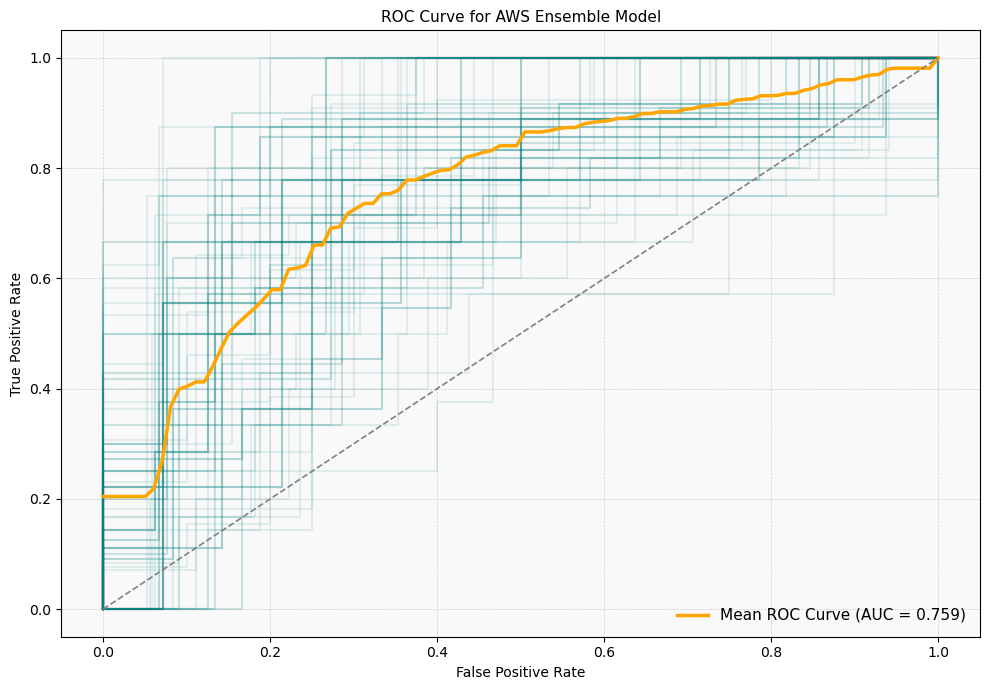

Generating PR Curve


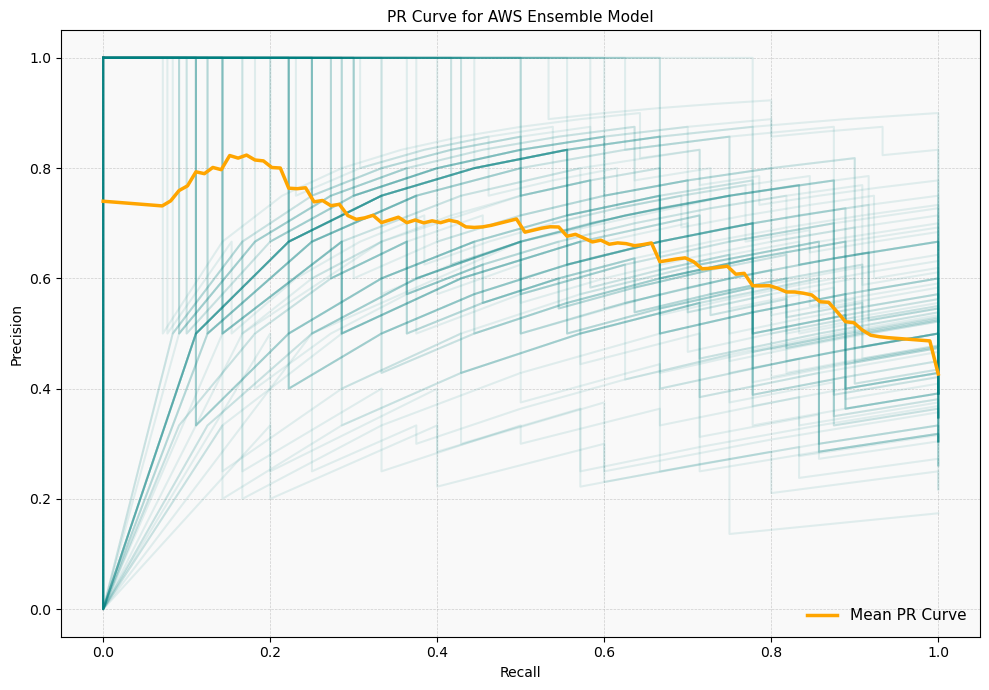

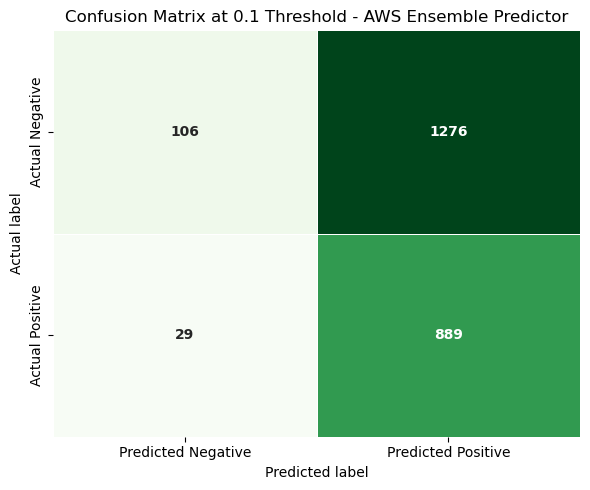

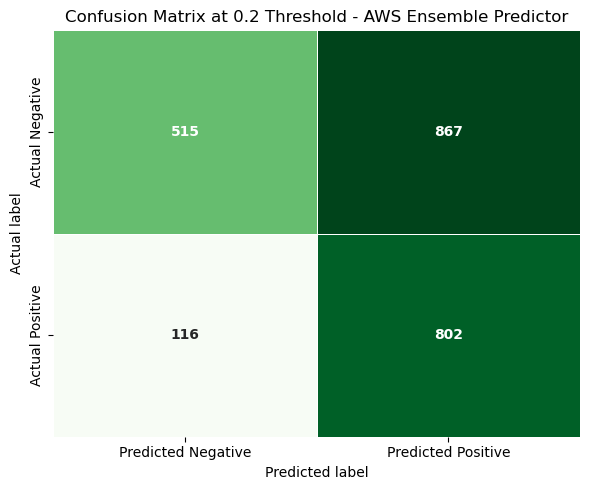

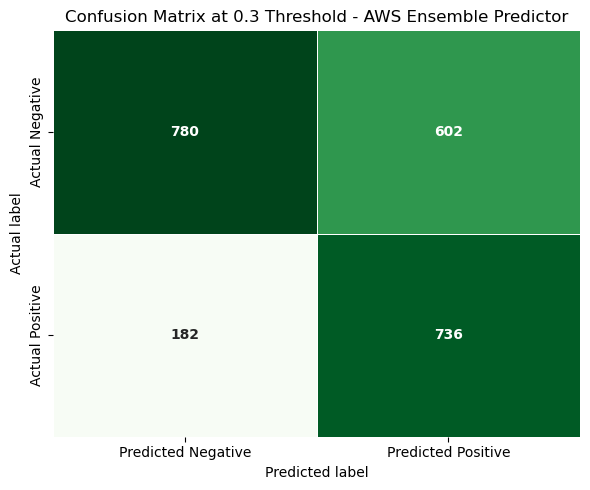

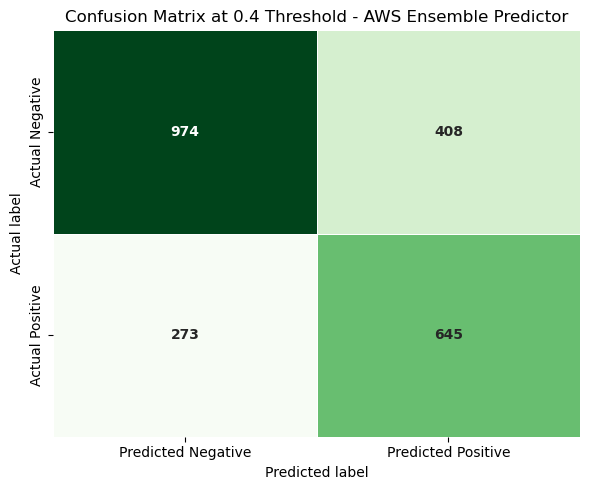

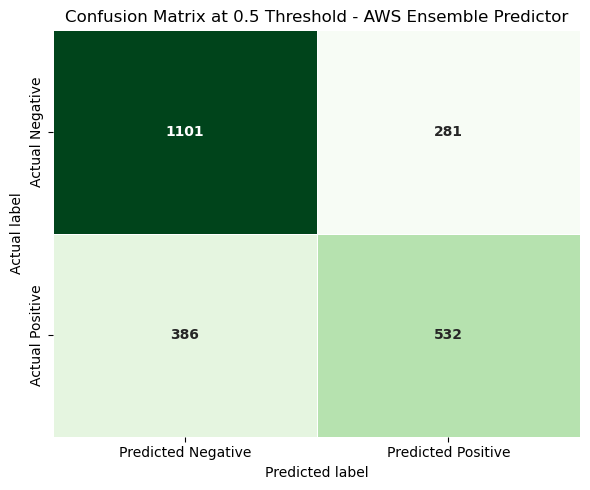

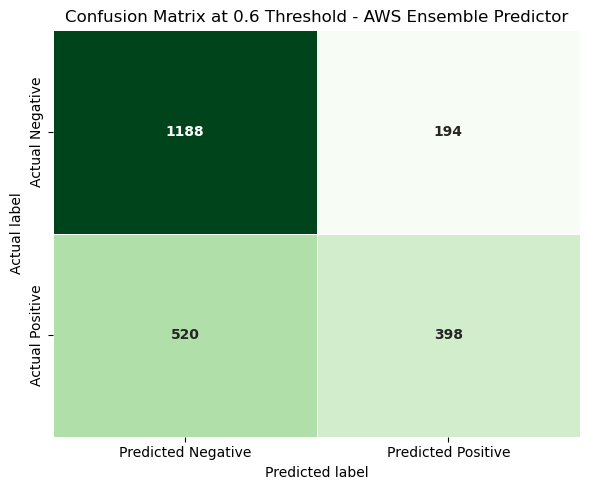

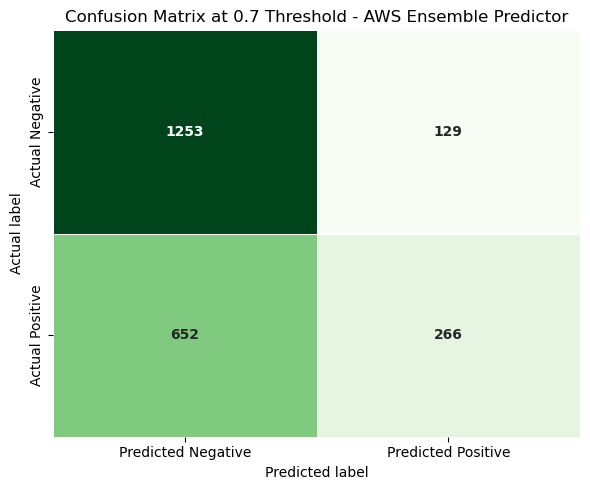

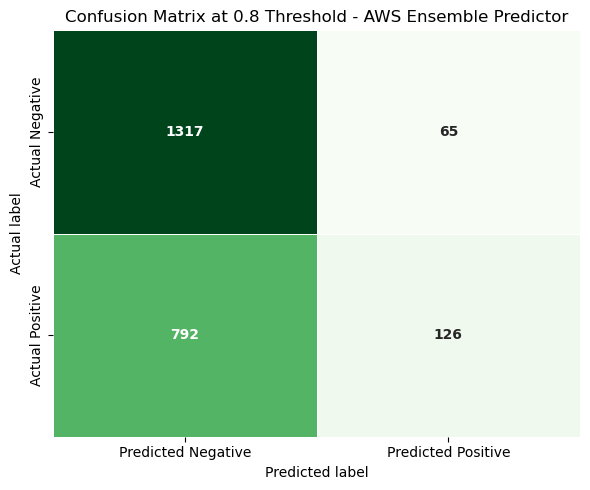

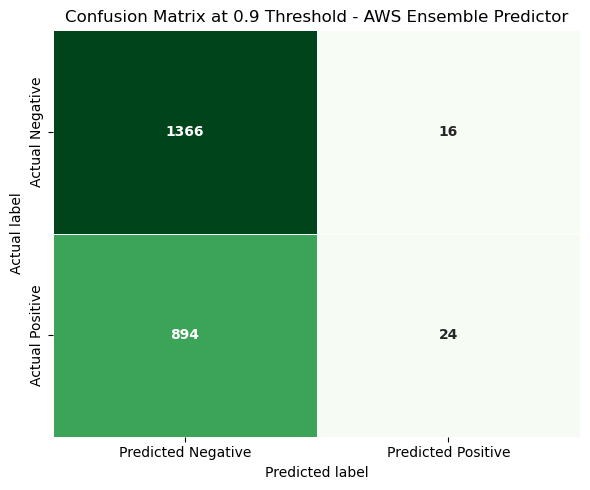

Plotting Permutation Importance for First Five Predictors (for Performance)


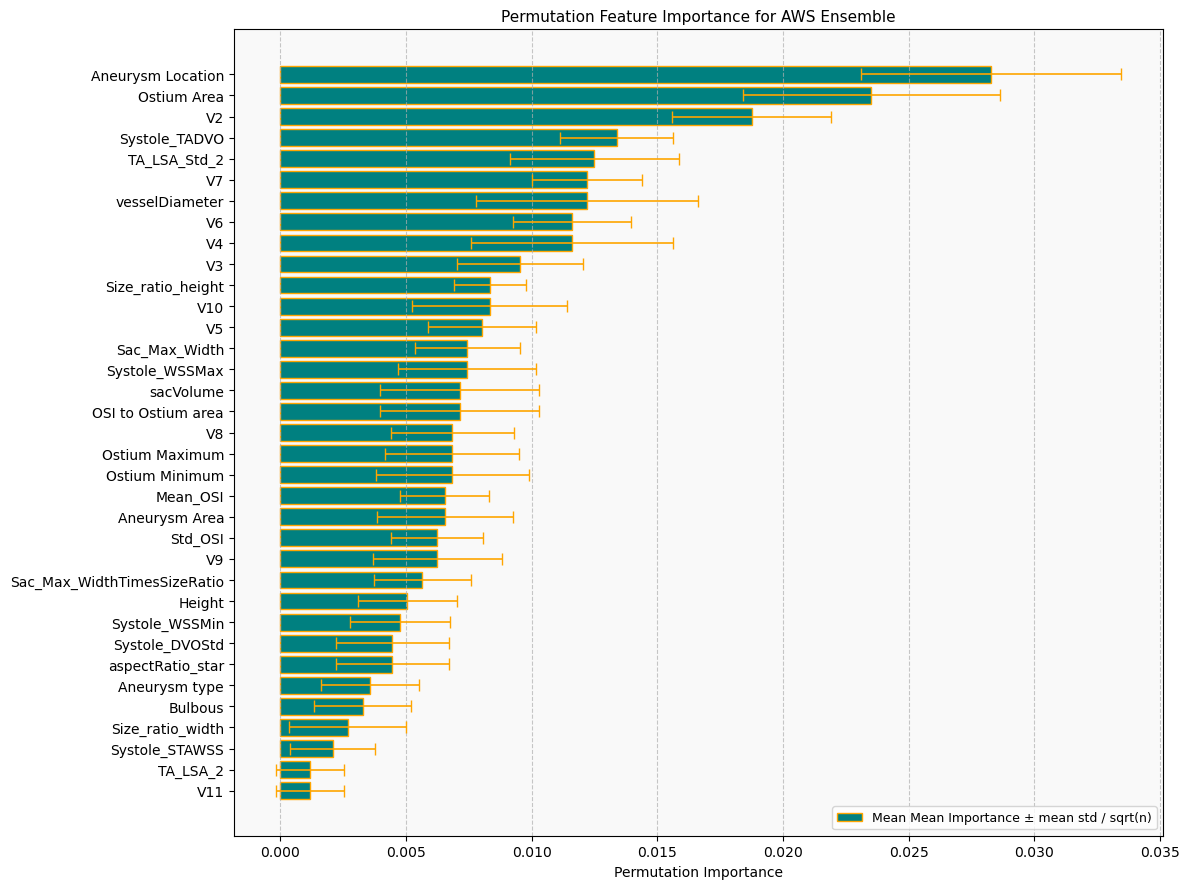

Plotting Shap Values for first five predictors (for performance)


  0%|          | 0/115 [00:00<?, ?it/s]

Plotting Final Metrics


Generating Graphs for Class NeuralNetTorch
Directory './AWSClasses04082025/NeuralNetTorch' created.
Generating ROC Plot


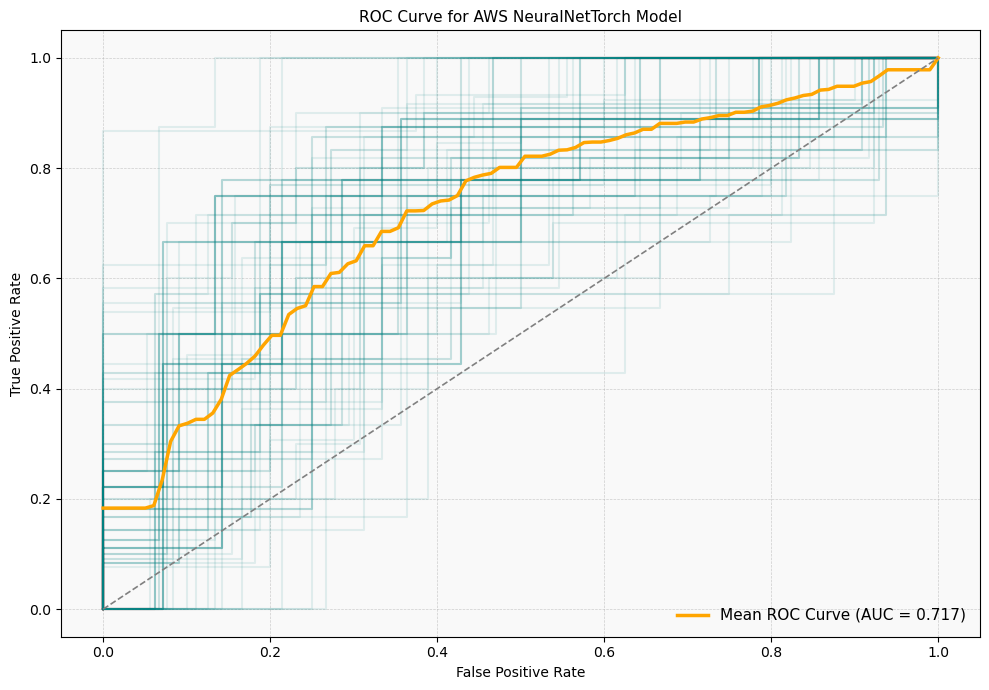

Generating PR Curve


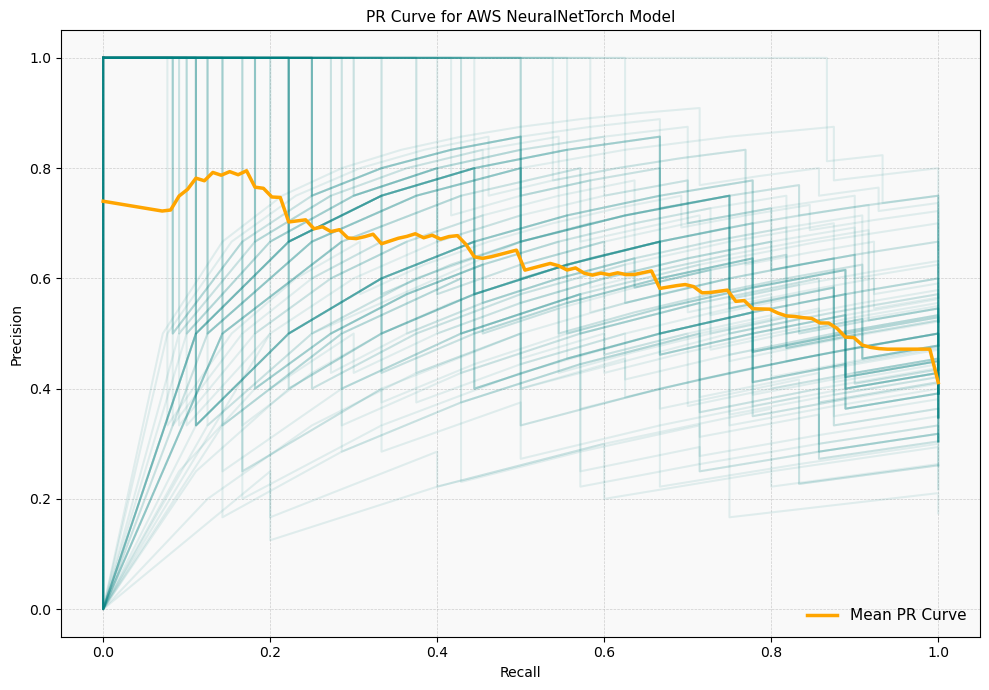

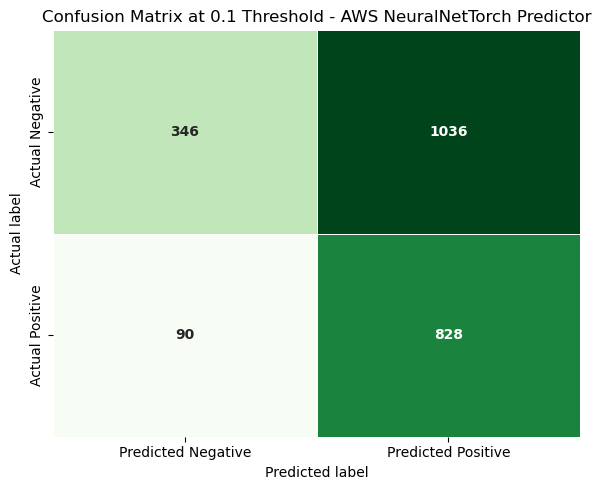

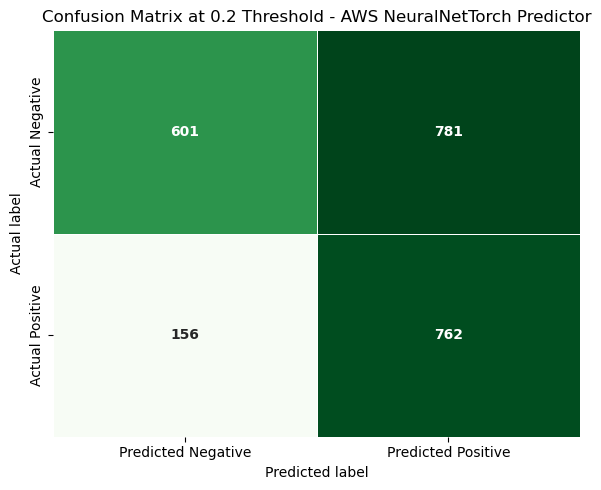

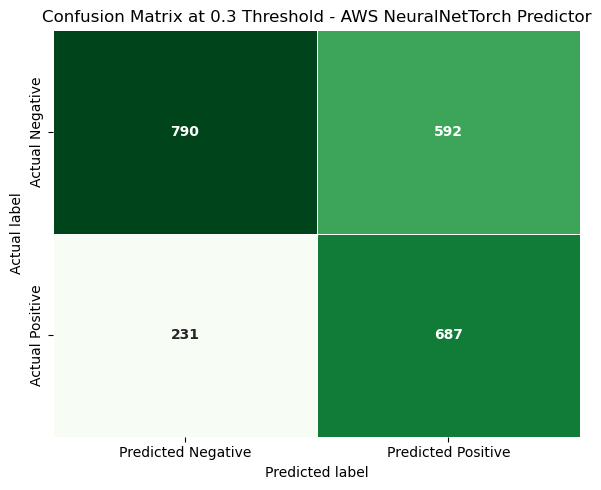

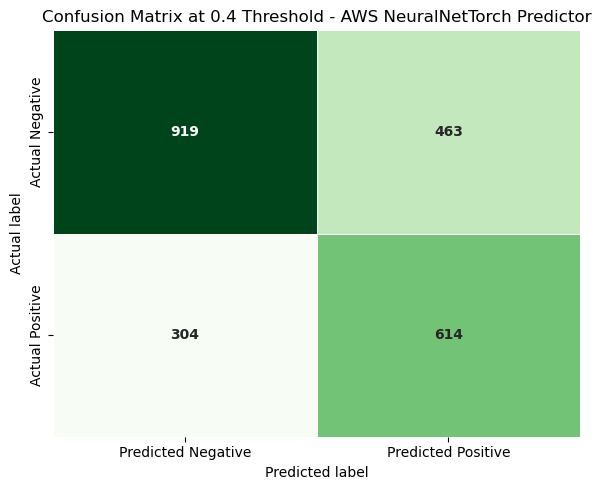

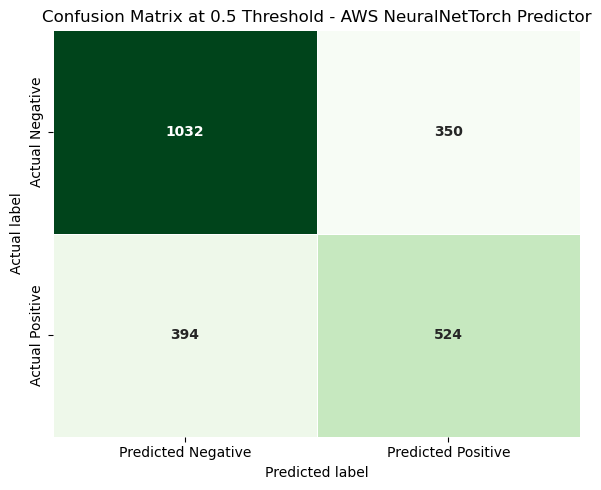

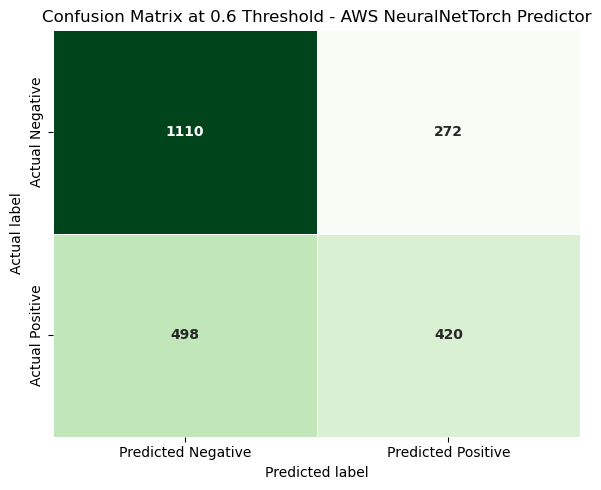

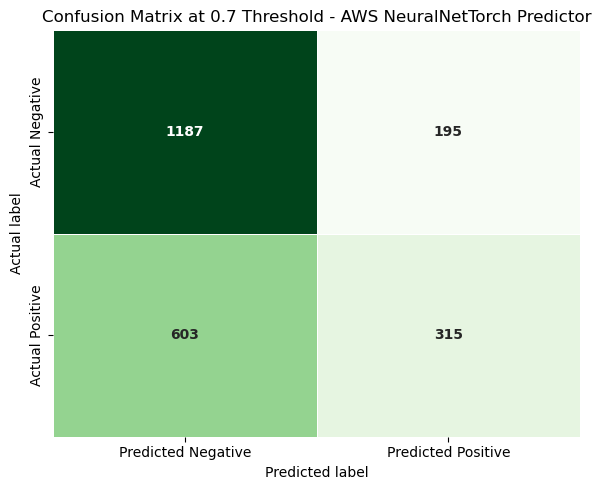

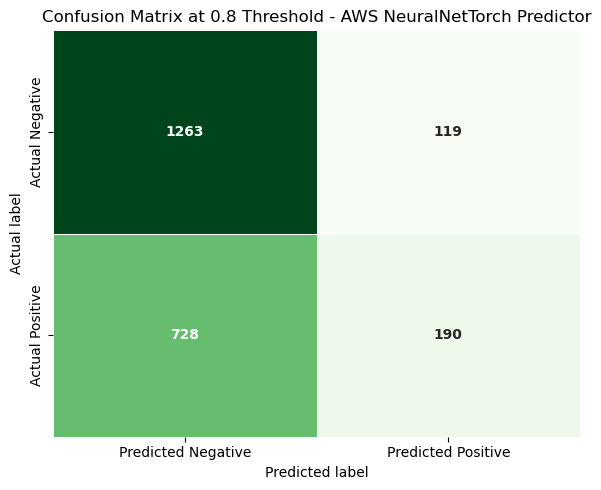

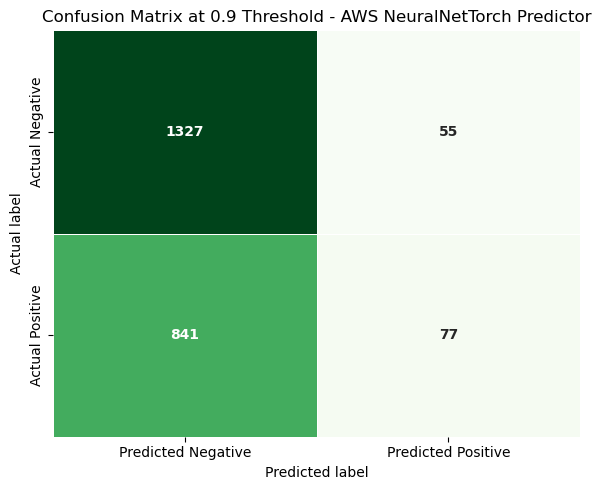

Plotting Permutation Importance for First Five Predictors (for Performance)


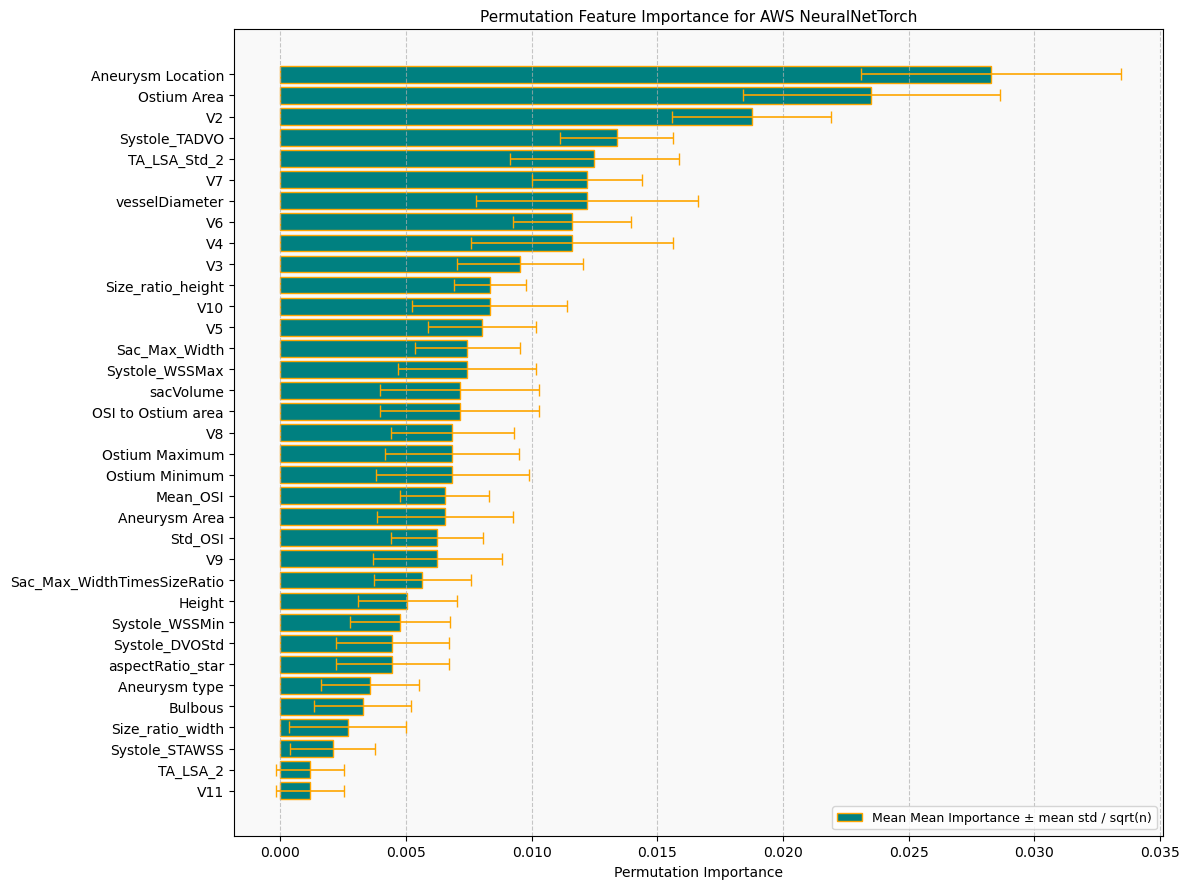

Plotting Shap Values for first five predictors (for performance)


  0%|          | 0/115 [00:00<?, ?it/s]

Plotting Final Metrics


Generating Graphs for Class ExtraTrees
Directory './AWSClasses04082025/ExtraTrees' already exists.
Generating ROC Plot


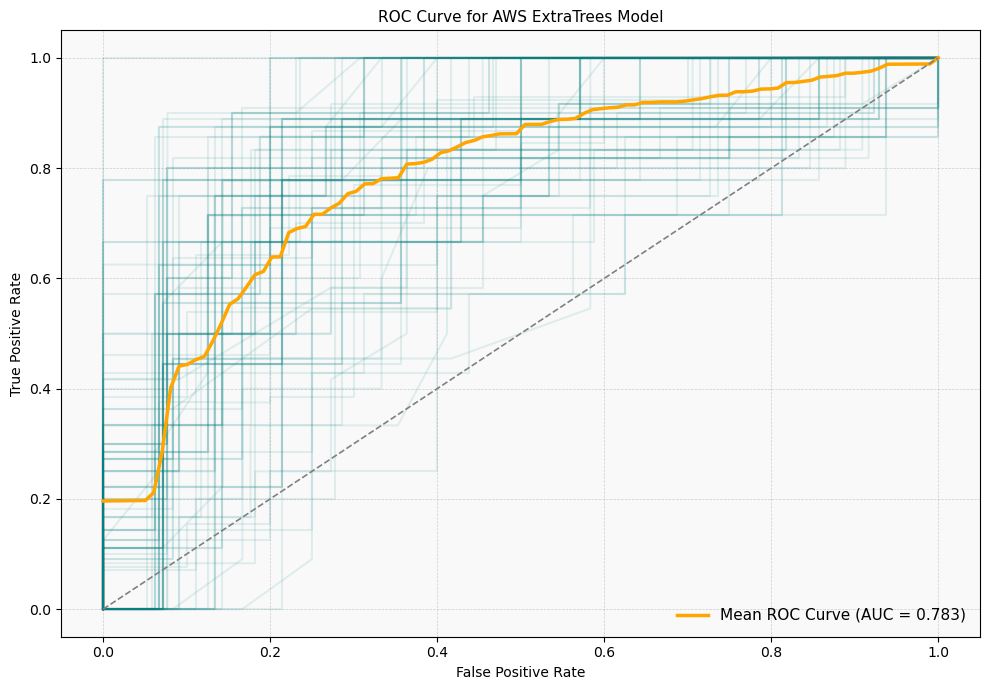

Generating PR Curve


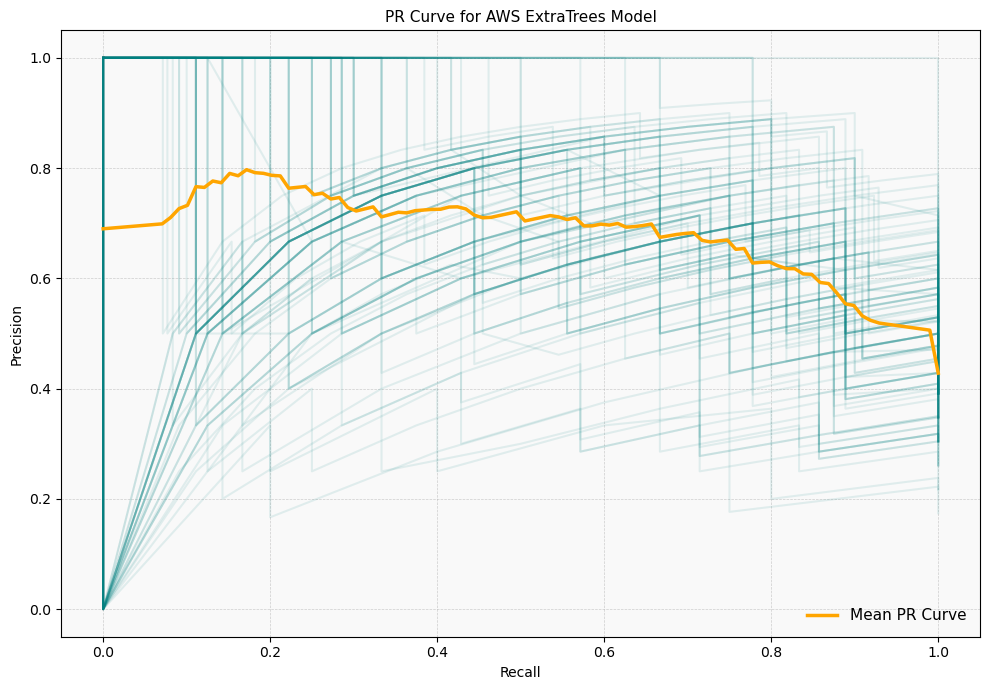

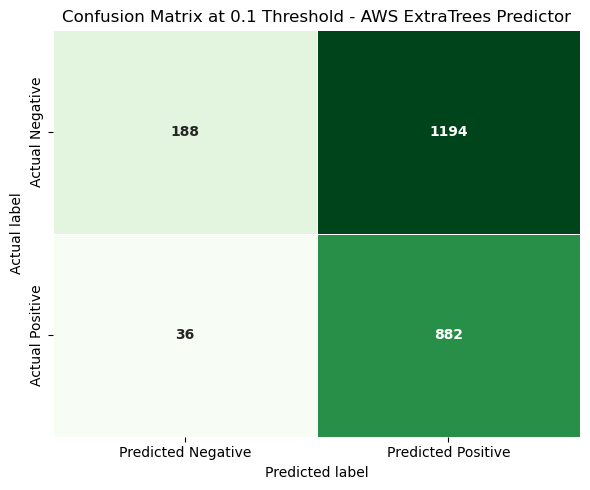

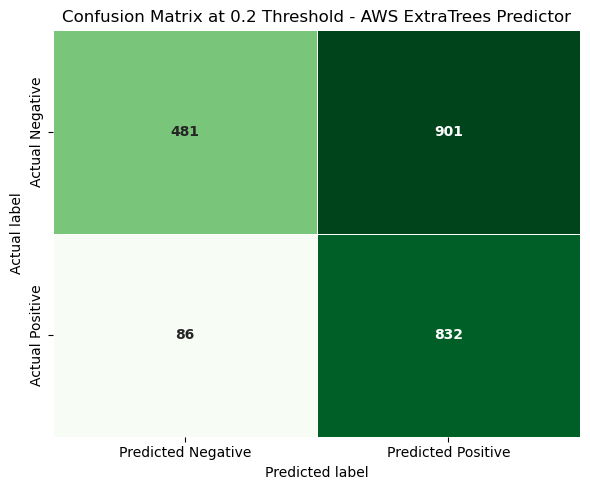

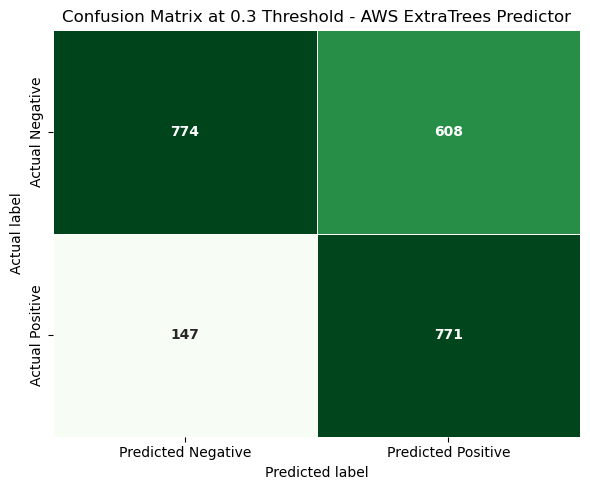

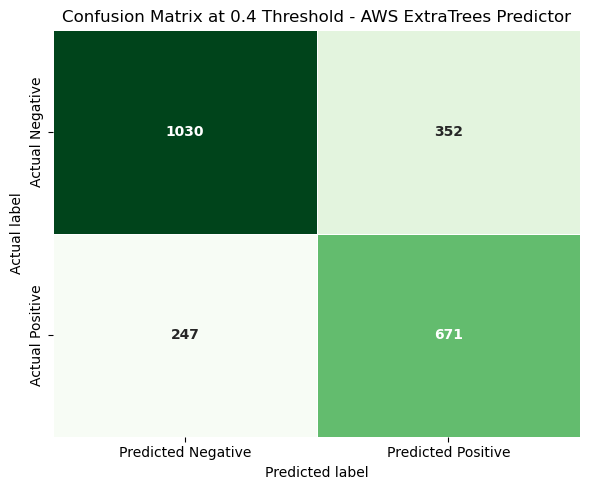

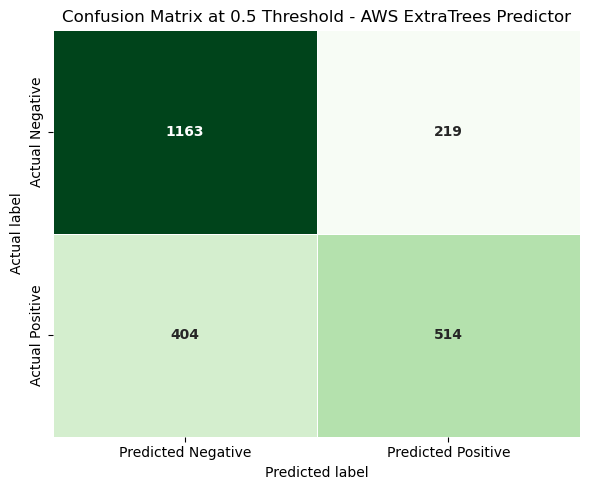

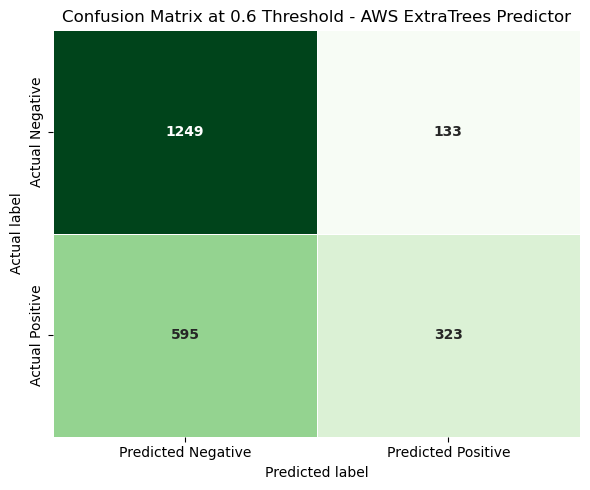

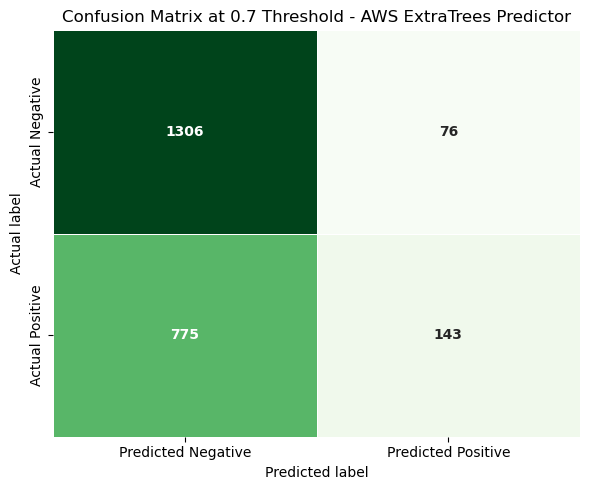

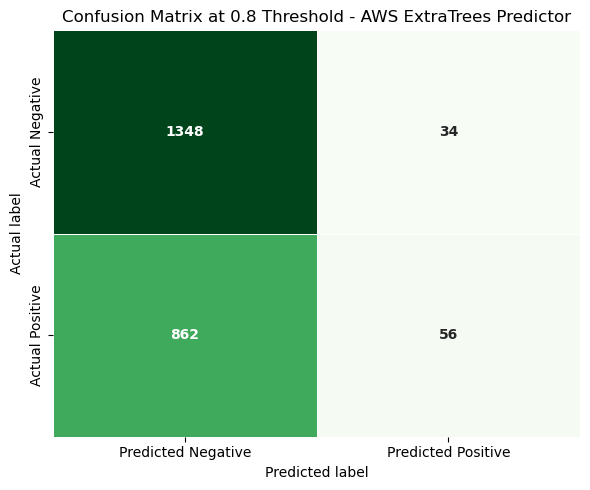

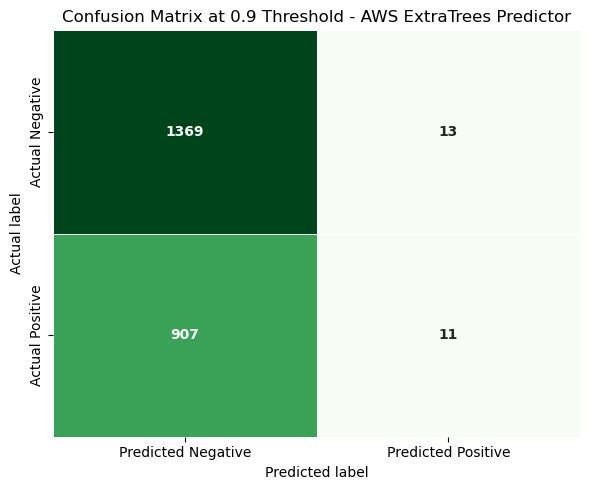

Plotting Permutation Importance for First Five Predictors (for Performance)


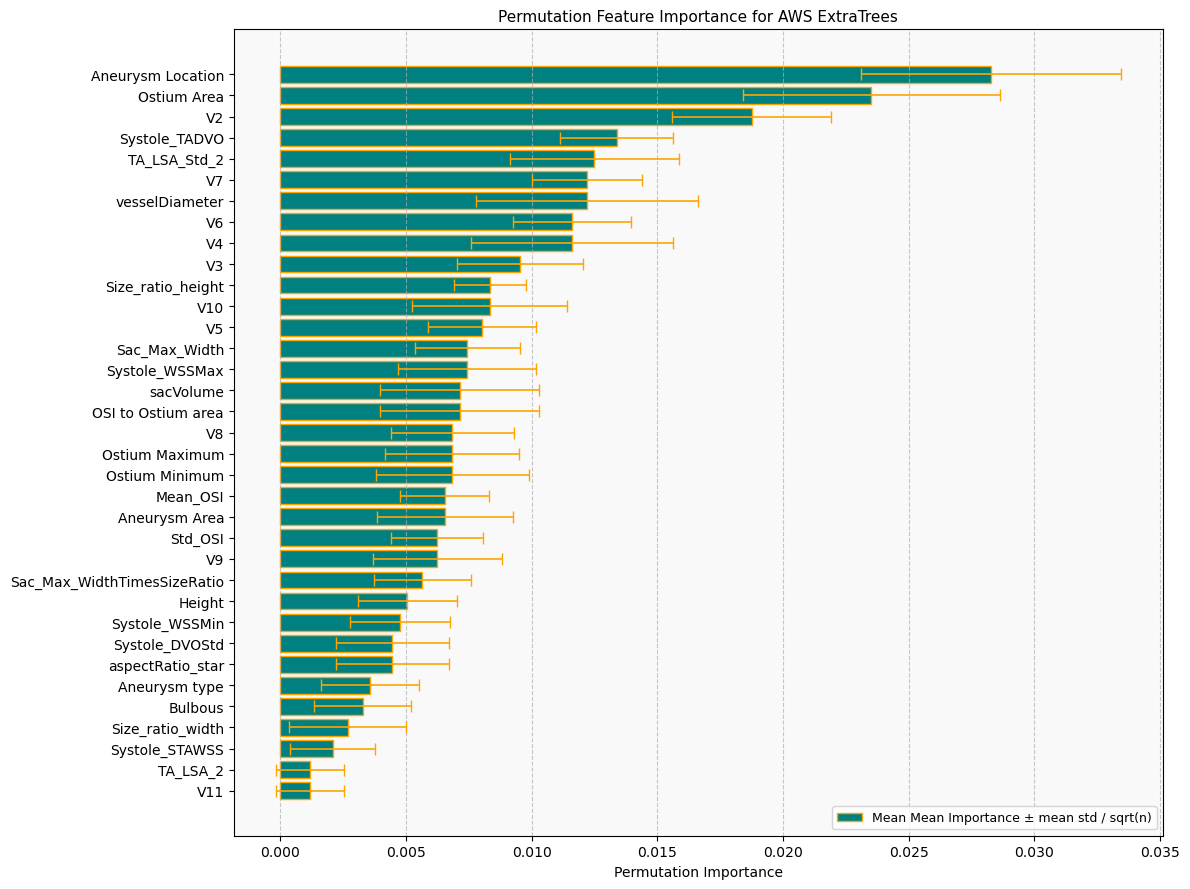

Plotting Shap Values for first five predictors (for performance)


  0%|          | 0/115 [00:00<?, ?it/s]

Plotting Final Metrics


Generating Graphs for Class Best
Directory './AWSClasses04082025/Best' created.
Generating ROC Plot


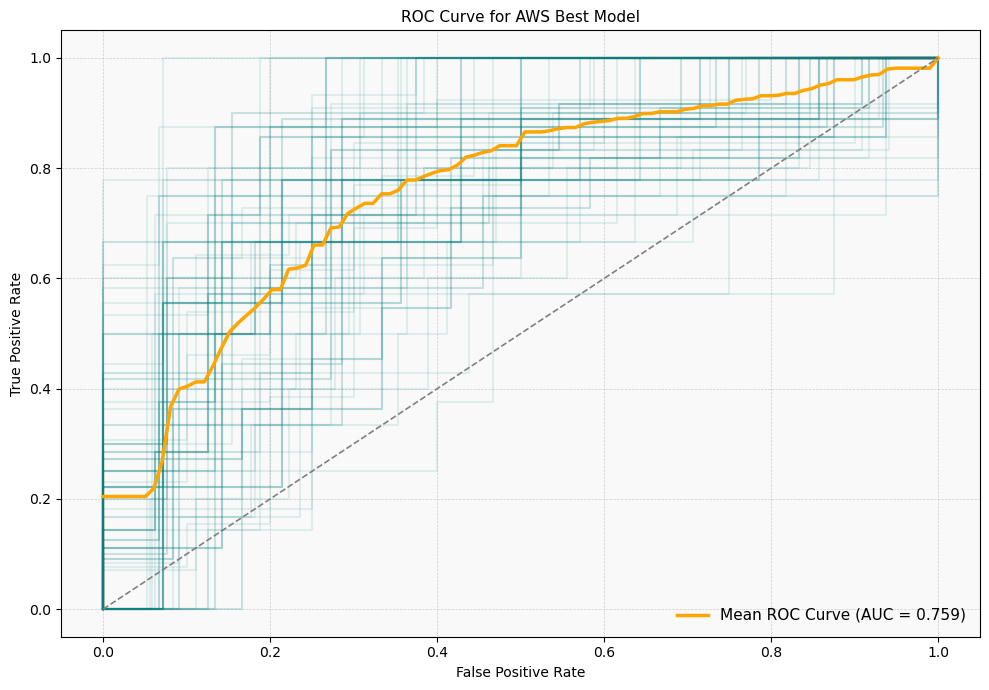

Generating PR Curve


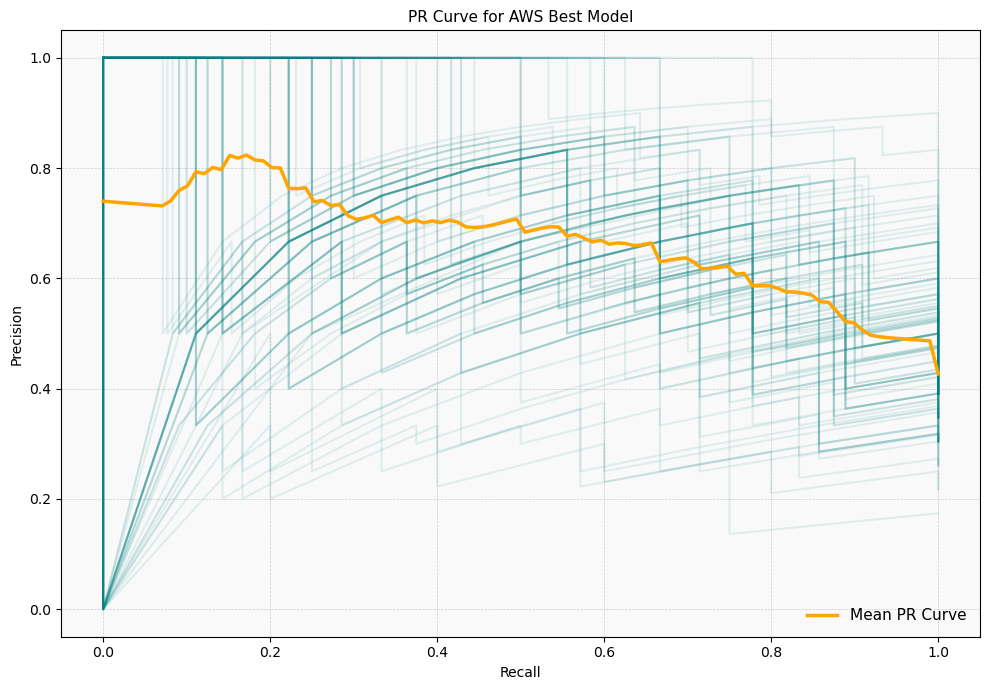

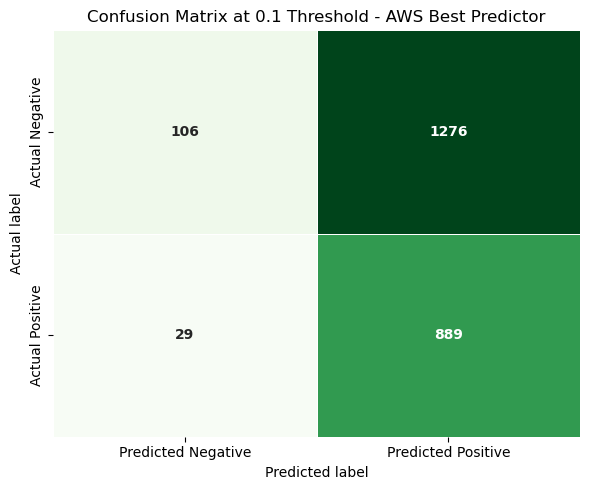

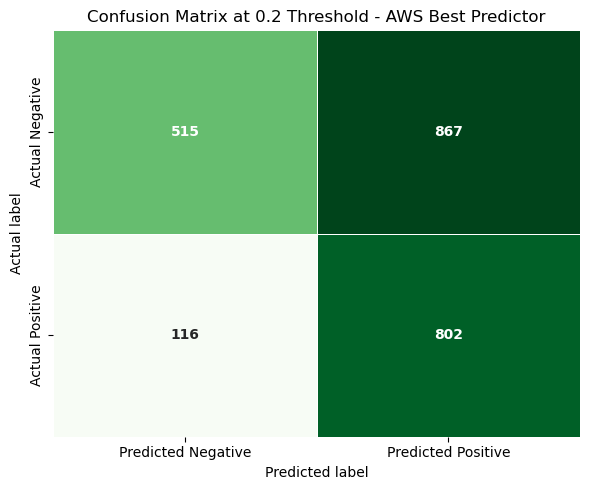

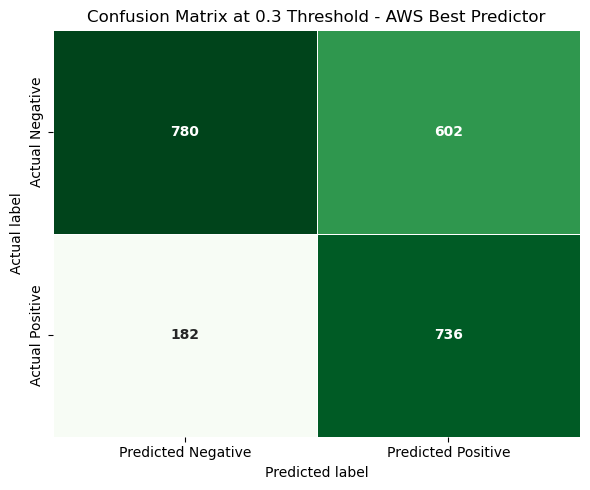

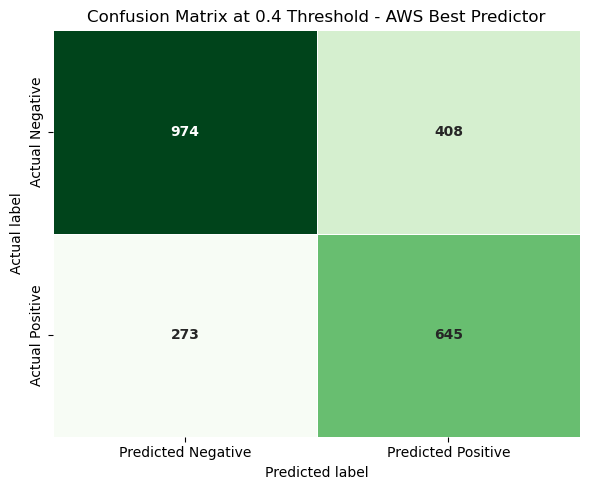

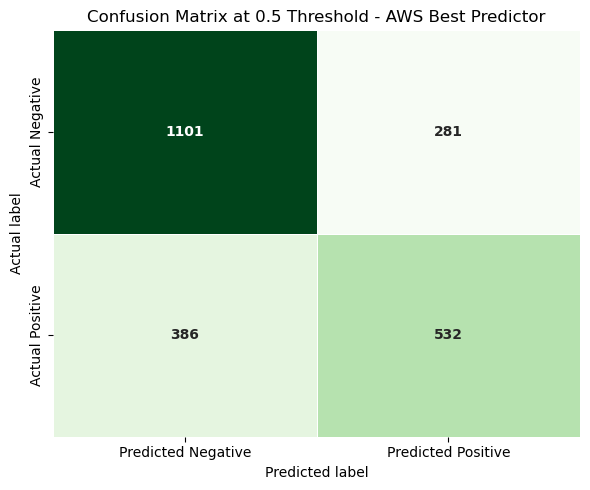

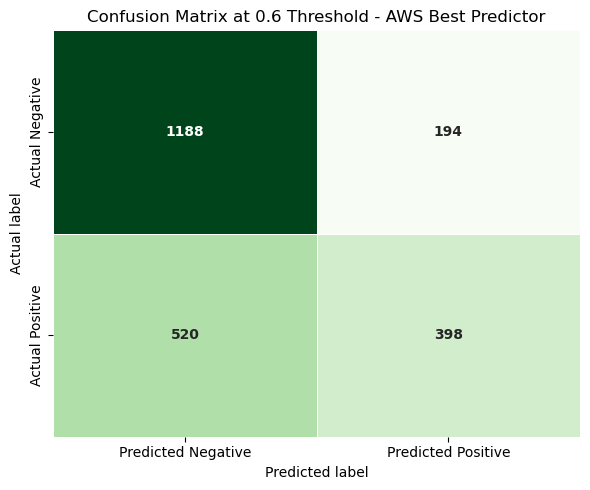

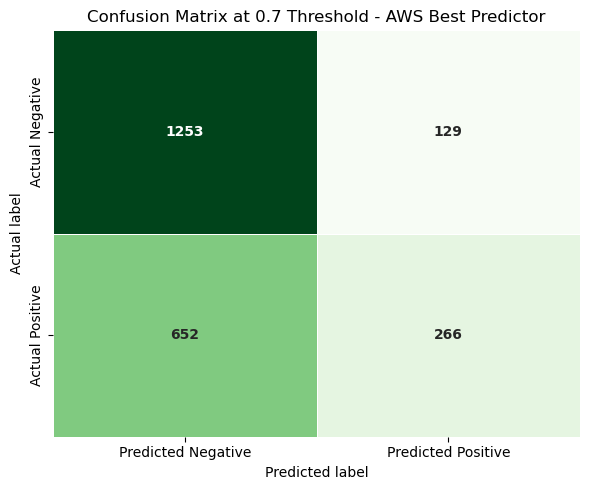

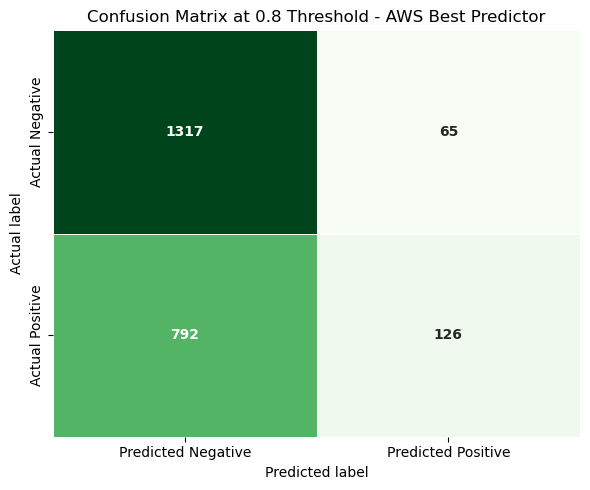

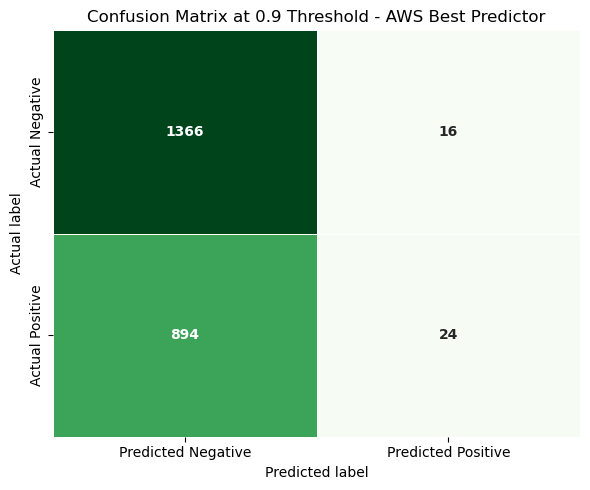

Plotting Permutation Importance for First Five Predictors (for Performance)


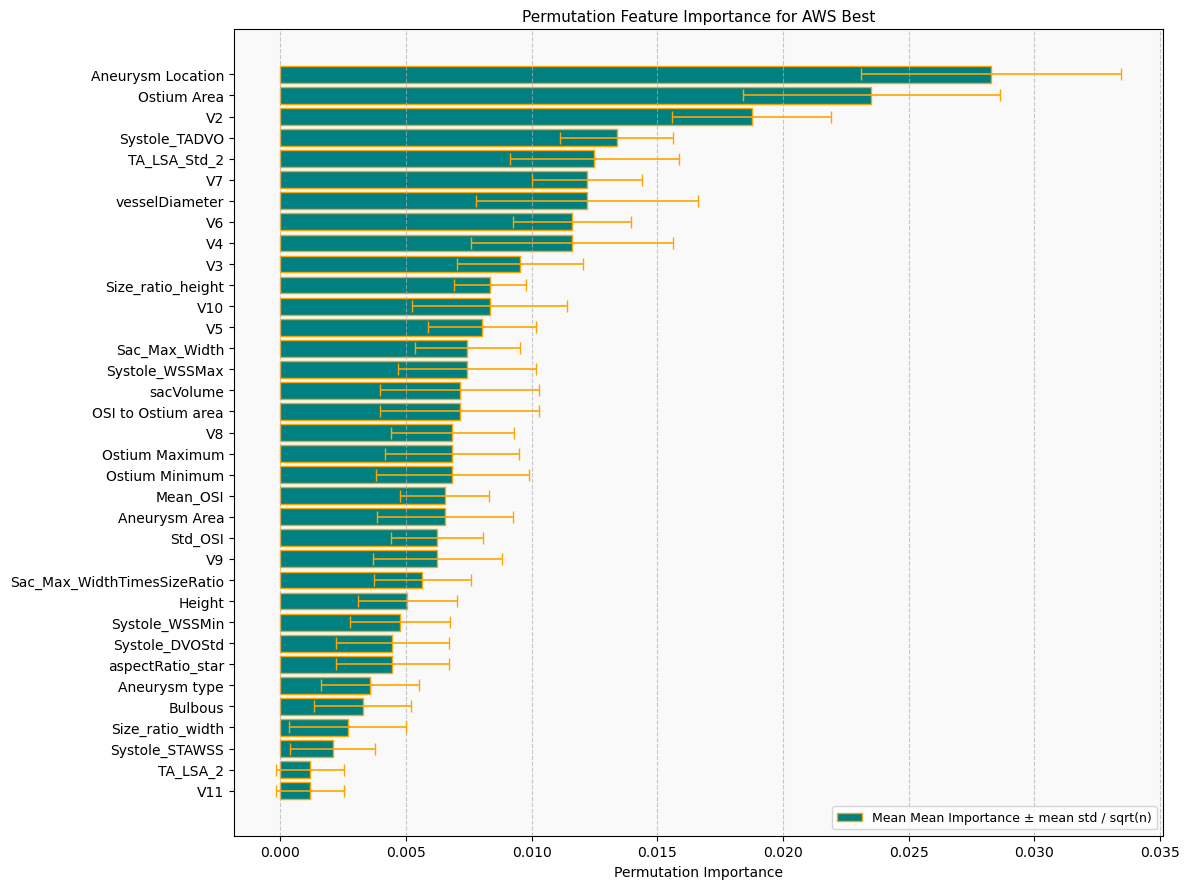

Plotting Shap Values for first five predictors (for performance)


  0%|          | 0/115 [00:00<?, ?it/s]

Plotting Final Metrics


In [56]:
import warnings
warnings.filterwarnings('ignore')

for c in last_few_models: # change back to classes
    print(f"Generating Graphs for Class {c}")
    pred_test_probs = pred_test_probs_by_class[c][0]
    pred_train_probs = pred_train_probs_by_class[c][0]
    generate_graphs(train_data, y_train, test_data, y_test, pred_test_probs, pred_train_probs, predictors, f"./AWSClasses04082025/{c}", 1, "AWS", c)

In [34]:
import matplotlib
import shap
print('matplotlib: {}'.format(matplotlib.__version__))
print('shap: {}'.format(shap.__version__))

matplotlib: 3.9.2
shap: 0.43.0


### BART
Details of BART library: https://www.pymc.io/projects/bart/en/latest/



In [53]:
%conda install -c conda-forge pymc-bart

Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/pytorch_p310

  added / updated specs:
    - pymc-bart


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.21.0               |     pyhd8ed1ab_0         1.4 MB  conda-forge
    binutils_impl_linux-64-2.43|       h4bf12b8_2         5.4 MB  conda-forge
    binutils_linux-64-2.43     |       h4852527_2          34 KB  conda-forge
    cachetools-5.5.2           |     pyhd8ed1ab_0          15 KB  conda-forge
    cons-0.4.6                 |     pyhd8ed1ab_1          14 KB  conda-forge
    etuples-0.3.9              |     pyhd8ed1ab_1   

## Google Cloud

In [ ]:
train_data = pd.read_csv("gcloud_datasets/training/train_data1.csv")
val_data = pd.read_csv("gcloud_datasets/validation/val_data1.csv")
test_data = pd.read_csv("gcloud_datasets/testing/test_data1.csv")

for i in range(2, 2):
    train_data = pd.concat([train_data, pd.read_csv(f"gcloud_datasets/training/train_data{i}.csv")], axis=0)
    val_data = pd.concat([val_data, pd.read_csv(f"gcloud_datasets/validation/val_data{i}.csv")], axis=0)
    test_data = pd.concat([test_data, pd.read_csv(f"gcloud_datasets/testing/test_data{i}.csv")], axis=0)

In [ ]:
predictors = [TabularPredictor.load(f"./autogluon_models{i}/") for i in range(1, 42)]

In [ ]:
import glob
import os

# For concatenating predictions for google cloud train / test / val prediction data

# Get a list of all CSV files in the current directory
csv_files = glob.glob(os.path.join('./gcloud_datasets/prediction', 'prediction.results-*.csv'))

# Create an empty list to store DataFrames
all_df = []

# Iterate through the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    all_df.append(df)

# Concatenate all DataFrames in the list into one DataFrame
combined_df = pd.concat(all_df, ignore_index=True)

# Print the combined DataFrame
combined_df.to_csv("./gcloud_datasets/prediction/test_prediction.csv")

In [ ]:
test_prediction = pd.read_csv("./gcloud_datasets/prediction/test_prediction.csv")
train_prediction = pd.read_csv("./gcloud_datasets/prediction/train_prediction.csv")
val_prediction = pd.read_csv("./gcloud_datasets/prediction/val_prediction.csv")

In [ ]:
test_prediction

In [ ]:
test_prediction.columns

In [ ]:
y_test = test_data.pop("ruptureStatus")
y_train = train_data.pop("ruptureStatus")
y_val = val_data.pop("ruptureStatus")

In [ ]:
test_data

In [ ]:
y_test

In [ ]:
pred_test_probs

In [ ]:

pred_test_probs = pd.DataFrame({1: test_prediction["ruptureStatus_1_scores"]})
pred_train_probs = pd.DataFrame({1: train_prediction["ruptureStatus_1_scores"]})
pred_val_probs = pd.DataFrame({1: val_prediction["ruptureStatus_1_scores"]})

generate_graphs(train_data, y_train, val_data, y_val, test_data, y_test, pred_test_probs, pred_train_probs, pred_val_probs, "./Google", 1, "Google")

## Azure

In [ ]:
!conda --version

In [ ]:
!conda env create -f ./azure_models/conda.yaml

In [ ]:
!conda env list

In [ ]:
!conda init && source ~/anaconda3/etc/profile.d/conda.sh && activate project_environment && which python

In [ ]:
!which python

In [ ]:
import sys
print(sys.executable)

In [ ]:
!pip install azureml azureml.automl

In [ ]:
import joblib

model = joblib.load("./azure_models/model1.pkl")

In [ ]:
import pickle
import pandas as pd

predictors = [TabularPredictor.load(f"./autogluon_models{i}/") for i in range(1, 11)]


with open("./azure_models/model1.pkl", "rb") as model_file:
    model = pickle.load(model_file)


### Use kernel azure_environment_4

In [ ]:
import joblib
import azureml

model = joblib.load("./azure_models/scoring_model.pkl")

In [ ]:
model.predict

In [ ]:

# Separate features and labels
y_true = y_pred
X_test = test_data

# Generate Predictions and Probabilities
pred_probs = predictor.predict_proba(X_test)
prob_positive = pred_probs[1]  # Probability of positive class
predicted_labels_default = predictor.predict(X_test)

# Define Confidence Thresholds
confidence_thresholds = [delta*0.01 for delta in range(101)]

In [ ]:
# Performance Metrics Analysis at different confidence thresholds
metrics_df = pd.DataFrame(columns=[
    'Threshold', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'Specificity', 
    'FPR', 'FNR'
])

for threshold in confidence_thresholds:
    predicted_labels = (prob_positive >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, predicted_labels).ravel()

    accuracy = accuracy_score(y_true=y_true, y_pred=predicted_labels)
    auc_score = roc_auc_score(y_true=y_true, y_score=prob_positive)
    precision = precision_score(y_true=y_true, y_pred=predicted_labels)
    recall = recall_score(y_true=y_true, y_pred=predicted_labels)
    f1 = f1_score(y_true, predicted_labels)
    sp = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    performance_summary = {
        'Threshold': threshold,
        'Accuracy': accuracy,
        'AUC': auc_score,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Specificity': sp,
        'FPR': fpr,
        'FNR': fnr,
    }

    metrics_df = pd.concat([metrics_df, pd.DataFrame(data=performance_summary, index=[0])], axis=0).reset_index(drop=True)
pd.set_option('display.max_rows', None)

print(metrics_df)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.patches as mpatches


# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=prob_positive)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color="gray", label="Reference")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AutoGluon (AWS) Predictor')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_true=y_true, probas_pred=prob_positive)

plt.figure(figsize=(8, 6))
sns.lineplot(x=recall_vals, y=precision_vals, errorbar=None)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AutoGluon (AWS) Predictor')
plt.grid(True)
plt.show()

In [ ]:
# Confusion Matrix at default (0.5) threshold
cm = confusion_matrix(y_true=y_true, y_pred=predicted_labels_default)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix at Default (0.5) Threshold - AutoGluon (AWS) Predictor')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define custom thresholds to evaluate
thresholds = [0.5, 0.60, 0.70, 0.80]

# Generate confusion matrices at different thresholds
for threshold in thresholds:
    predicted_labels = (prob_positive >= threshold).astype(int)  # Apply threshold

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true=y_true, y_pred=predicted_labels)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix at {threshold:.2f} Threshold - AutoGluon (AWS) Predictor')
    plt.show()


In [ ]:
# Feature Importance Analysis with AutoGluon
feature_importance_df = predictor.feature_importance(pd.concat([X_test, y_true], axis=1), feature_stage="original", num_shuffle_sets=30)
feature_importances_sorted = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importances_sorted.head(10))
# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_sorted["importance"][0:10], y=feature_importances_sorted.index[0:10], color='steelblue')
plt.title('Top 10 Permutation Importance w.r.t. Test Data on AWS')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Feature Importance Analysis with AutoGluon, all Data

feature_importance_df = predictor.feature_importance(pd.concat([pd.concat([X_test, train_data[0:90], val_data[0:10]], axis=0).reset_index(drop=True), pd.concat([y_true, y_pred_train[0:90], y_pred_val[0:10]], axis=0).reset_index(drop=True)], axis=1), feature_stage="original", num_shuffle_sets=30)
feature_importances_sorted = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importances_sorted.head(10))
# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_sorted["importance"][0:10], y=feature_importances_sorted.index[0:10], color='steelblue')
plt.title('Top 10 Permutation Importance w.r.t. Train + Val + Test Data on AWS')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
np.int = int  # Fix for the deprecated np.int alias

# Assume you have:
# predictor: AutoGluon TabularPredictor loaded
# X_test: pandas DataFrame (without target column)

# Define a wrapper function for prediction:
def predict_wrapper(x_array):
    df = pd.DataFrame(x_array, columns=X_test.columns)
    preds = predictor.predict_proba(df)
    # Return probabilities for positive class (class 1)
    return preds.iloc[:, 1]

# Choose a smaller background dataset for speed (e.g., 100 samples)
background_data = shap.sample(X_test, 100, random_state=42)

# Initialize KernelExplainer with the wrapper
explainer = shap.KernelExplainer(predict_wrapper, data=background_data)

# Compute SHAP values (this can take a long time depending on your dataset)
shap_values = explainer.shap_values(X_test, nsamples=100)

In [ ]:
shap.plots.violin(shap_values, feature_names=X_test.columns)


In [ ]:
shap.summary_plot(shap_values, X_test.columns, plot_type='bar', plot_size=(8, 6))

In [ ]:
shap.summary_plot(shap_values, X_test.columns)

In [ ]:
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'
np.str = str
shap.dependence_plot("vesselDiameter", shap_values, X_test)

In [ ]:
shap.dependence_plot("V4", shap_values, X_test)

In [ ]:
shap.dependence_plot("Ostium Area", shap_values, X_test)

In [ ]:
shap.dependence_plot("Ostium Minimum", shap_values, X_test)

In [ ]:
shap.dependence_plot("aspectRatio_star", shap_values, X_test)

In [ ]:
shap.dependence_plot("Sac_Max_Width", shap_values, X_test)

In [ ]:
shap.dependence_plot("Size_ratio_width", shap_values, X_test)

In [ ]:
shap.dependence_plot("TA_LSA_Std_2", shap_values, X_test)

In [ ]:
shap.dependence_plot("Aneurysm Location", shap_values, X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:10], X_test.iloc[:10])


In [ ]:
X_test.shape

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[0:10], X_test[0:10])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Comparison to Results from the Provided Paper (example)
paper_results = pd.DataFrame({
    "Model": ["LR", "SVM", "RF", "XGBoost", "MLPNN", "BART"],
    "Accuracy": [0.74, 0.77, 0.76, 0.81, 0.76, 0.77],
    "AUC": [0.71, 0.76, 0.73, 0.78, 0.73, 0.73],
    "Precision": [0.74, 0.73, 0.73, 0.84, 0.73, 0.80],
    "Recall": [0.56, 0.73, 0.61, 0.64, 0.62, 0.55],
    "F1 (Harmonic Mean of PPV and Senativity)": [0.62, 0.71, 0.64, 0.71, 0.66, 0.63],
})

autogluon_results = pd.DataFrame({
    'Model': ['AutoGluon (AWS) Predictor'],
    'Accuracy': [0.8333],
    'AUC': [0.78125],
    'Precision': [0.7500],
    'Recall': [0.7500],
    'F1 (Harmonic Mean of PPV and Senativity)': [0.7500],
})

paper_results = pd.concat([paper_results, autogluon_results], ignore_index=True)

# Set Model names as index
paper_results.set_index("Model", inplace=True)

# Highlight Best Results
def highlight_best(s):
    is_max = s == s.max()
    return ["font-weight: bold" if v else "" for v in is_max]

styled_df = paper_results.style.apply(highlight_best, subset=paper_results.columns)

# Apply the highlighting
styled_df = paper_results.style.apply(highlight_best, subset=paper_results.columns)

# Display the styled dataframe
display(styled_df)
